# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Random undersampler for under sampling the data
from imblearn.under_sampling import RandomUnderSampler

# Use MICE since income data and marital status are likely to have been withheld on purpose
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Appending models into the list
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# To oversample and undersample data
from imblearn.over_sampling import SMOTE

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black


## Loading the dataset

In [2]:
df_raw = pd.read_csv('BankChurners.csv')
df = df_raw.copy()
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [3]:
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

In [4]:
df.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

In [5]:
df.describe(include=["object"]).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
df.shape

(10127, 21)

## Data Overview

- Observations
- Sanity checks

###Observations:

- There are total 10127 entries. So, we can split data into train, validation, test.
- Total 21 columns
- There are 6 object/category type columns, which need to be handled / converted before starting
- 2 columns have missing values : Education_Level, Marital_status. We will impute after splitting into test/val/test.
- Mean age is 46
- Dependent variable is unbalanced/skewed - only 20% are attrited (Existing 8500 /Attrited ~1600)
- Dummies can be created for Card_Category, Marital_status, Gender
- Replace strings with numbers for : Education_Level, Income_category
- Too few observations with card_category Platinum (20)
- Roughly same number of M and Female customers
- Income_Category abc looks strange and needs to be treated as missing.



In [8]:
#  duplicate values in the data
df.duplicated().sum()

0

In [9]:
#  missing values in the data
print(df.isnull().sum() )
print( round(df.isnull().sum() / df.isnull().count() * 100, 2))

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64
CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category         

In [10]:
# Types of entries in each column
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [11]:
# Making a list of all categorical variables
cat_col = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


Categorical Variables:
 "Attrition_Flag",
    "Gender",
     "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?

 Total_Trans_Amt - the distribution appears uneven and has 4 humps, and it is right skewed distribution. There are a lot of outliers on the right-hand side.  The max value of transaction amount for the attrition cases is even less than the median value of transaction amount for the non-attrition cases. Max Transaction Amt is 18484, and 75% are less than 4741


2. What is the distribution of the level of education of customers?

 Education_level: 40% are graduate or above. 15% are uneducated. There are a handful of outliers on the right hand side.
 30% are graduate. 15% uneducated.
 The attrition percentage is slightly higher for the post-graduates and doctorates, than the rest (for the rest the attrition percentage looks the same)

3. What is the distribution of the level of income of customers?

 There are 2 outliers. The median and the mean appear the same. The distribution is slightly right-skewed. Mean is '80k-120k'  though highest percentage of people are in the 'less than 40K' range. Attrition percentage is least in 60k-80k category and the most  in 120K+ catgeory


4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?

 total_ct_change_Q4_Q1 - the median value of total_ct_change_Q4_Q1 is higher in case of non-attrition cases than in the attrition cases. The min value of total_ct_change_Q4_Q1 is also higher in the non-attrition cases. The distribution appears normal balanced shape and the mean and median appear roughly the same, though there are  outliers on both sides.

5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?

 The attrition percentage was very high, ie, almost 50% in the months where the customers were very active, ie, where they were inactive for 0 months. Attrition decreases as the customers are inactive for longer.


6. What are the attributes that have a strong correlation with each other?

 100% Correlation - Avg_open_to_buy and Credit_limit

 Total_trans_amt and Total_trans_ct = 81% correlation

 Months_on_book and Customer Age - 79% correlation

 Avg_Utilisation_ratio and Total_revolving_bal - 62% correlation

 Also a 54% negative correlation between Avg_Utilisation_ratio and Avg_open_to_buy


 7. Other Observations:

-  customer age: median around 46yrs. Balanced distribution between 42-51.
- Months on book : median ~36 with 25% of people there. Balanced with a strong mid.
- Credit Limit: right skewed, median 5000. Most customers have low credit limit.  5% at the extreme low and extreme high ends.
- Total Revolving Balance - median 1250. Dual hump . 25% have 0.
- Avg_Open_To_Buy: Right skewed.
- Total Trn Cnt (Dual hump), median 65
- Total_Amt_Chng_Q4_Q1 - Balanced distribution
- Total_Ct_Chng_Q4_Q1 - balanced distribution
- Avg_Utilization_Ratio - right skewed, median close to 0.2. 25% have 0.
- Dependent_count = balanced . 50%+ are 2 or 3.
- Total relationship count - left skewed. Median is 4. 20% have 1 or 2 relationships.
- months_inactive_12mon, median 2. 70% are 3 or 2.
- Contact_count_12_mon, median 2. 62% are 2 or 3.
- GEnder: mean at 50%
- Marital_status: right skewed . 46% married.
- Income_Category: median 80k-120k, no outliers. 35% are less than 40k.
- Card Cateogy - lot of outliers, median at Blue - 95% are blue
-= Attrition_Flag -  median at 0, 1 for rouhgly < 2000, 16% attrition.


#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [12]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None, only_box=False):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column

    if only_box == False:
      sns.histplot(
          data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
      ) if bins else sns.histplot(
          data=data, x=feature, kde=kde, ax=ax_hist2
      )  # For histogram
      ax_hist2.axvline(
          data[feature].mean(), color="green", linestyle="--"
      )  # Add mean to the histogram
      ax_hist2.axvline(
          data[feature].median(), color="black", linestyle="-"
      )  # Add median to the histogram

In [13]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
   # count = data[feature].nunique()
   # if n is None:
   #     plt.figure(figsize=(count + 1, 5))
   # else:
   #     plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [14]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [15]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [16]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

<Figure size 640x480 with 0 Axes>

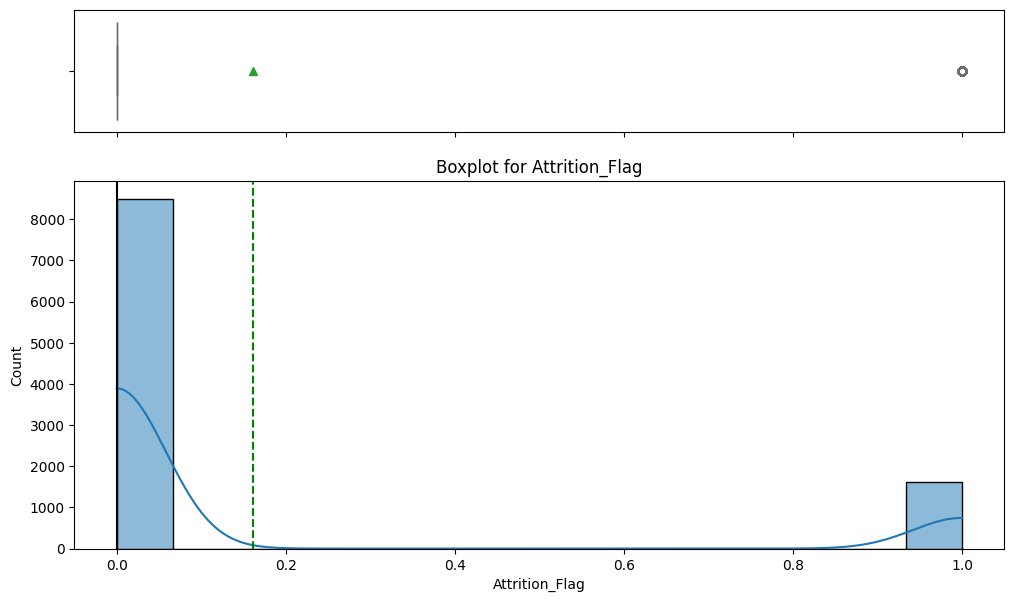

<Figure size 640x480 with 0 Axes>

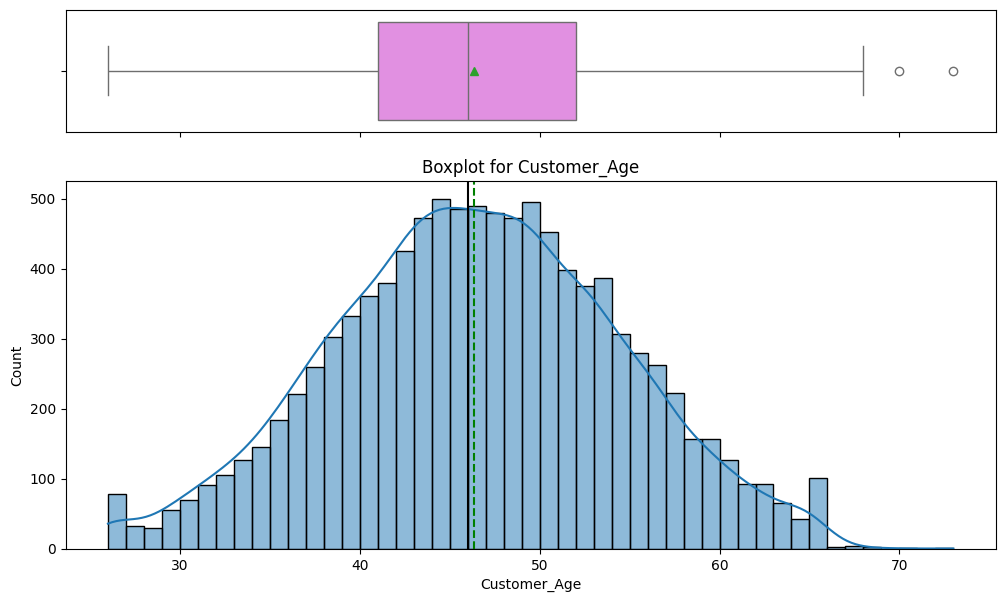

<Figure size 640x480 with 0 Axes>

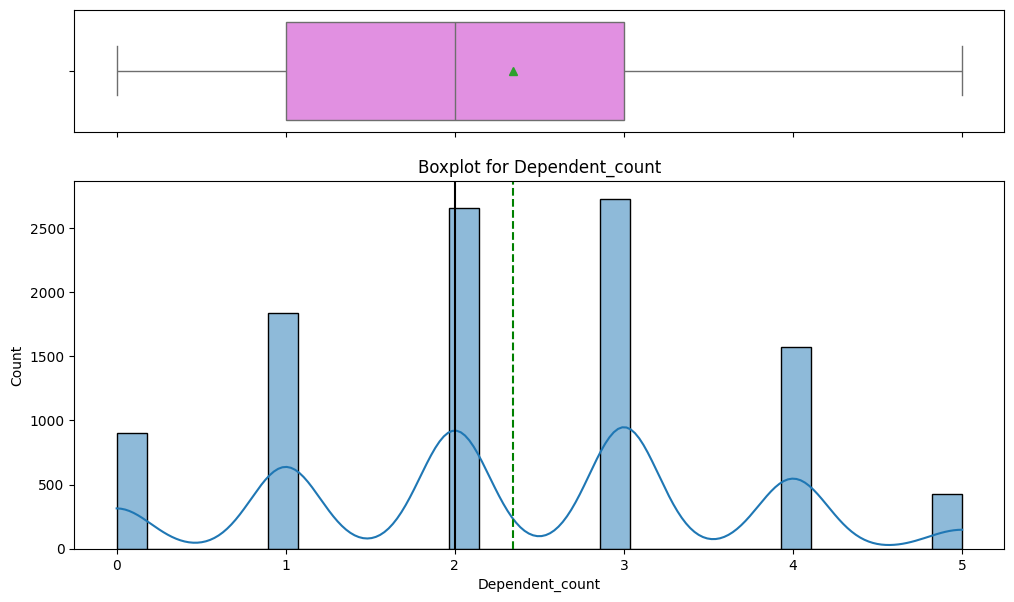

<Figure size 640x480 with 0 Axes>

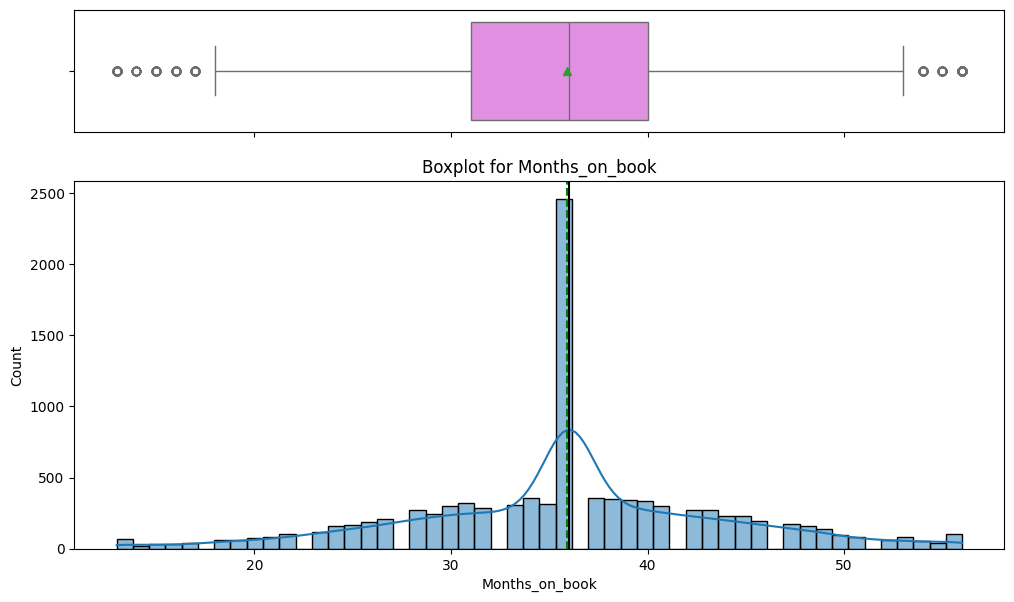

<Figure size 640x480 with 0 Axes>

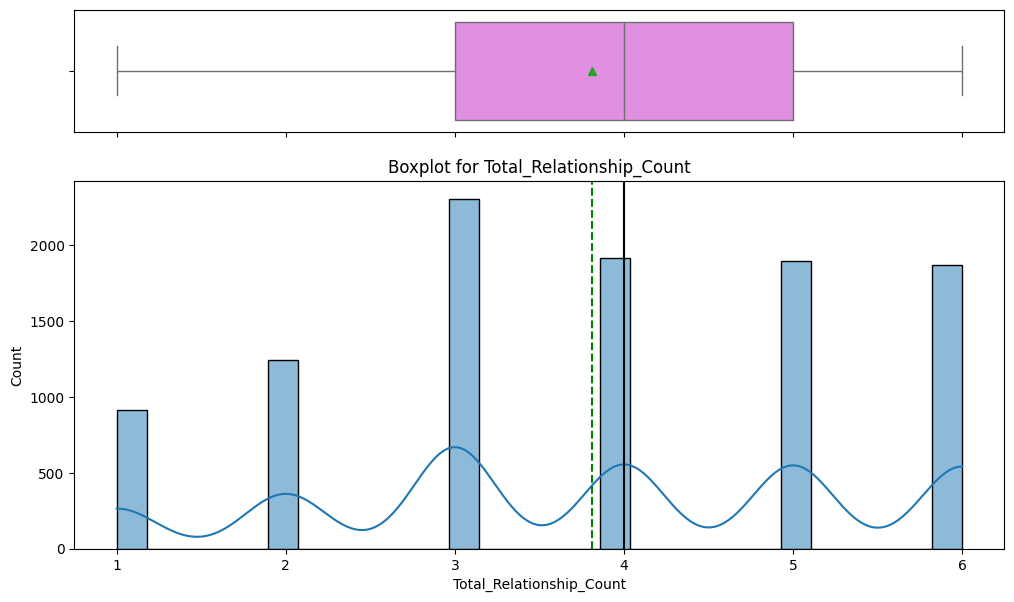

<Figure size 640x480 with 0 Axes>

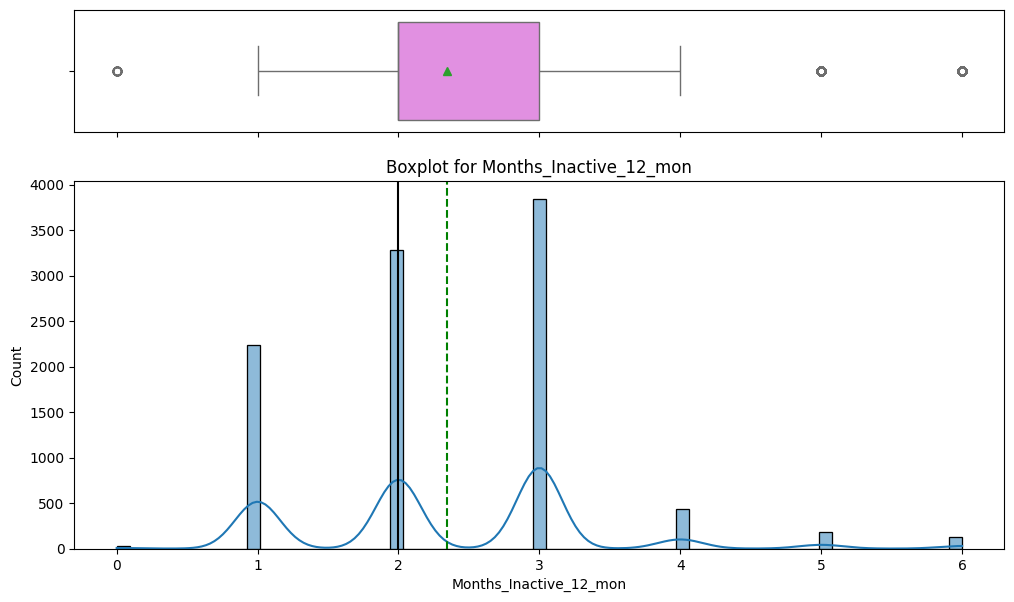

<Figure size 640x480 with 0 Axes>

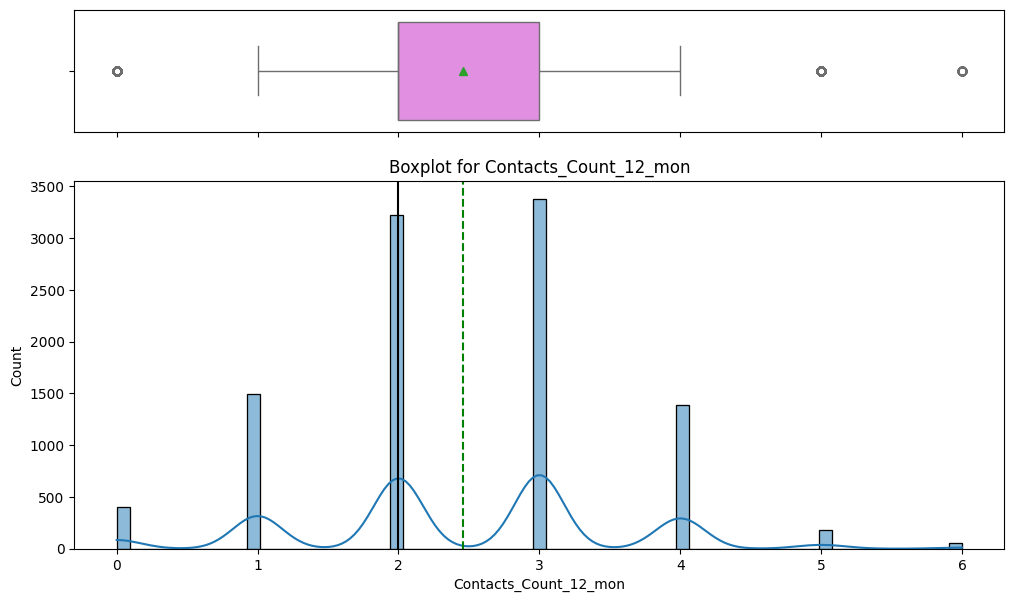

<Figure size 640x480 with 0 Axes>

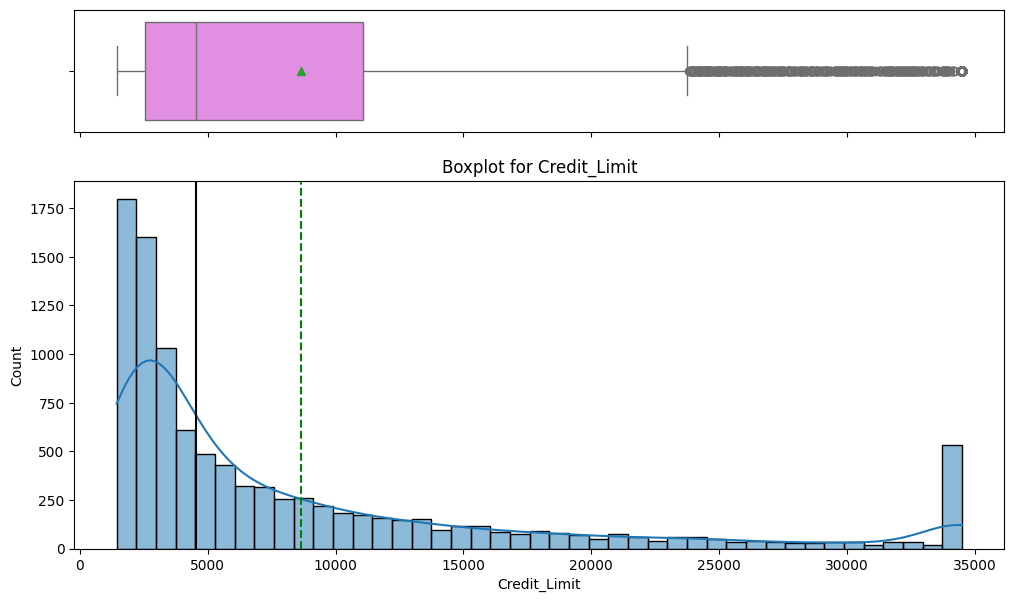

<Figure size 640x480 with 0 Axes>

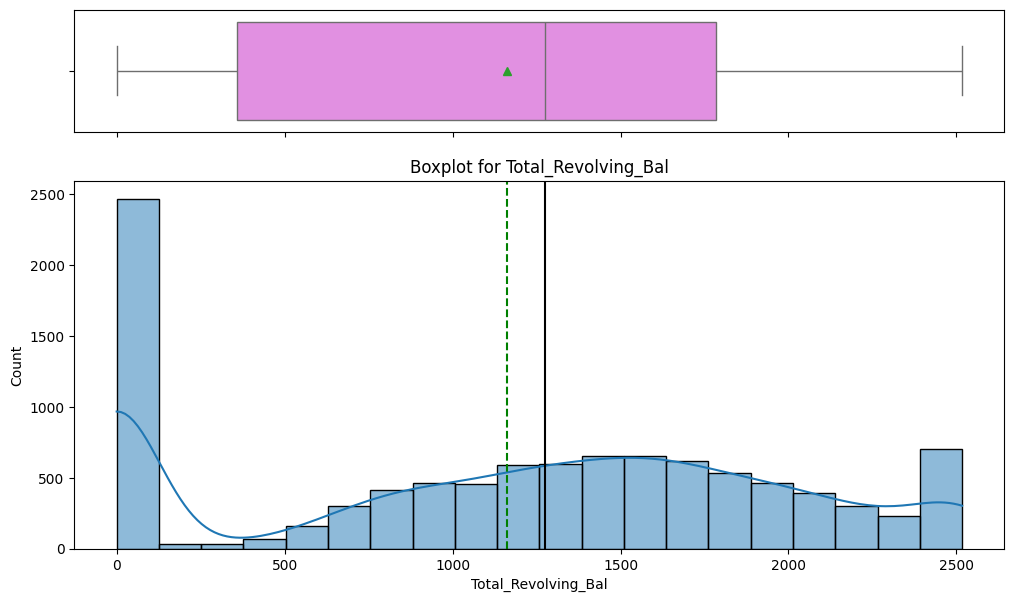

<Figure size 640x480 with 0 Axes>

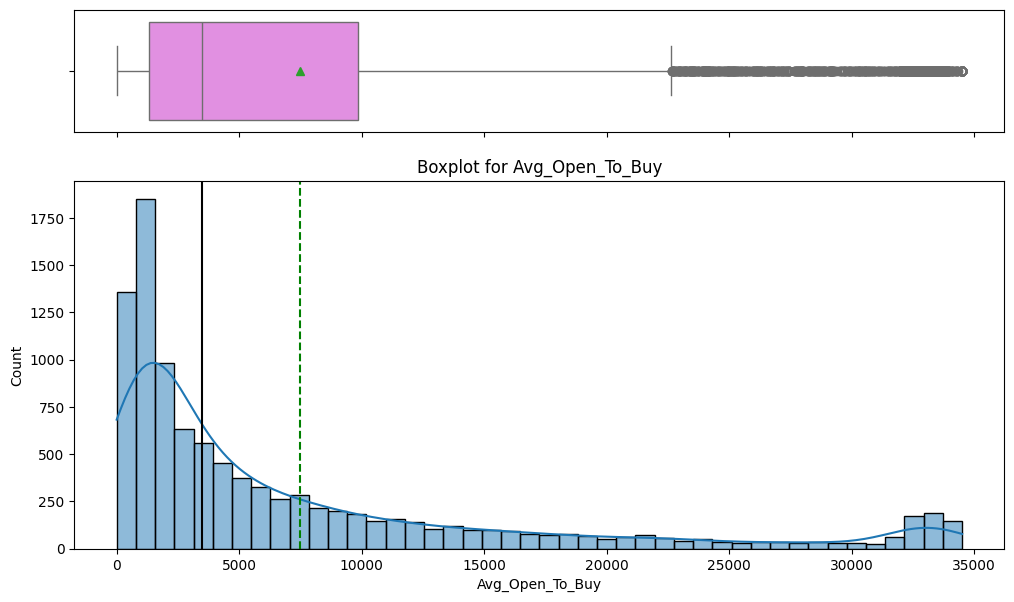

<Figure size 640x480 with 0 Axes>

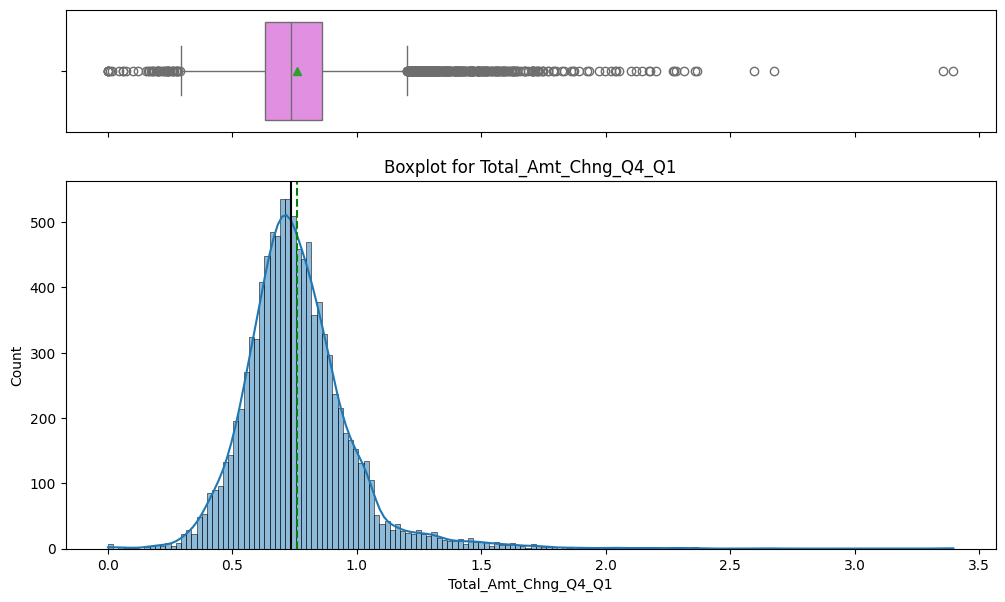

<Figure size 640x480 with 0 Axes>

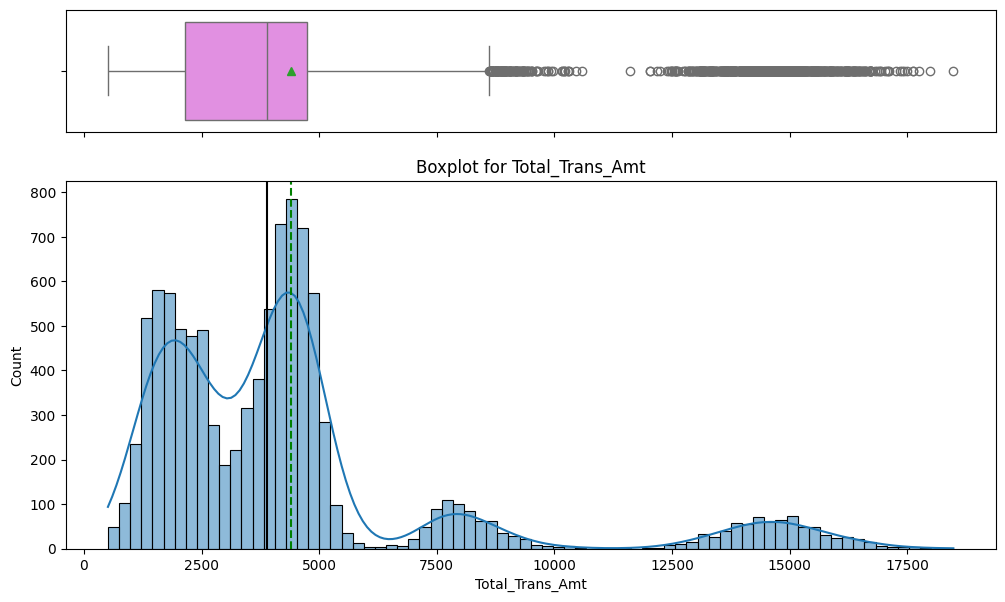

<Figure size 640x480 with 0 Axes>

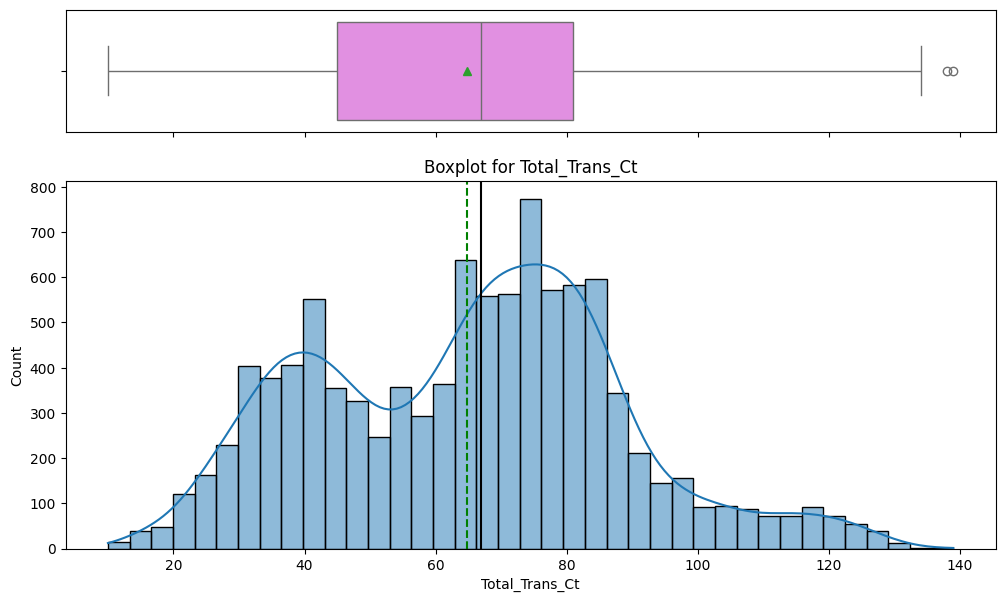

<Figure size 640x480 with 0 Axes>

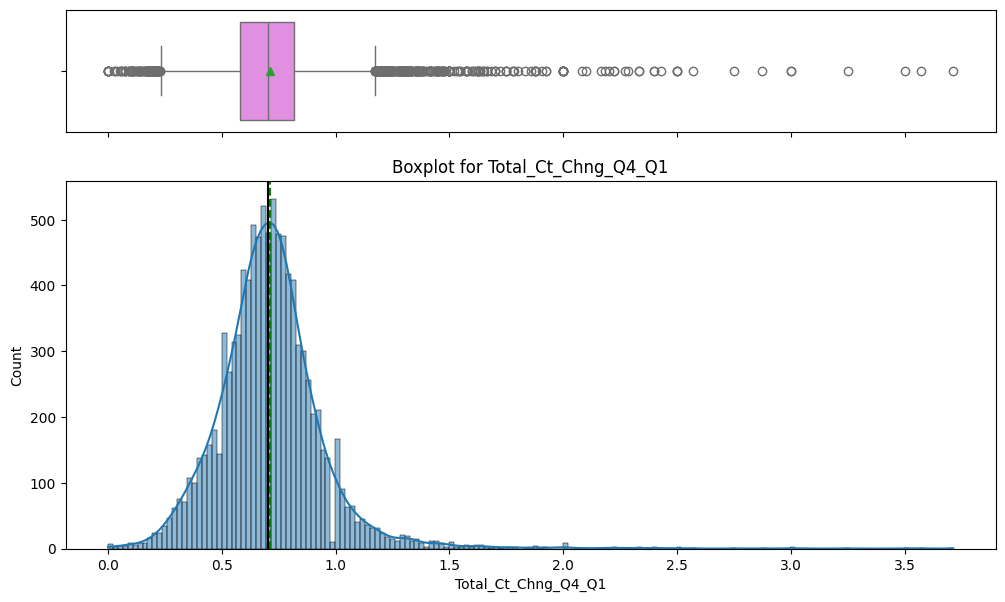

<Figure size 640x480 with 0 Axes>

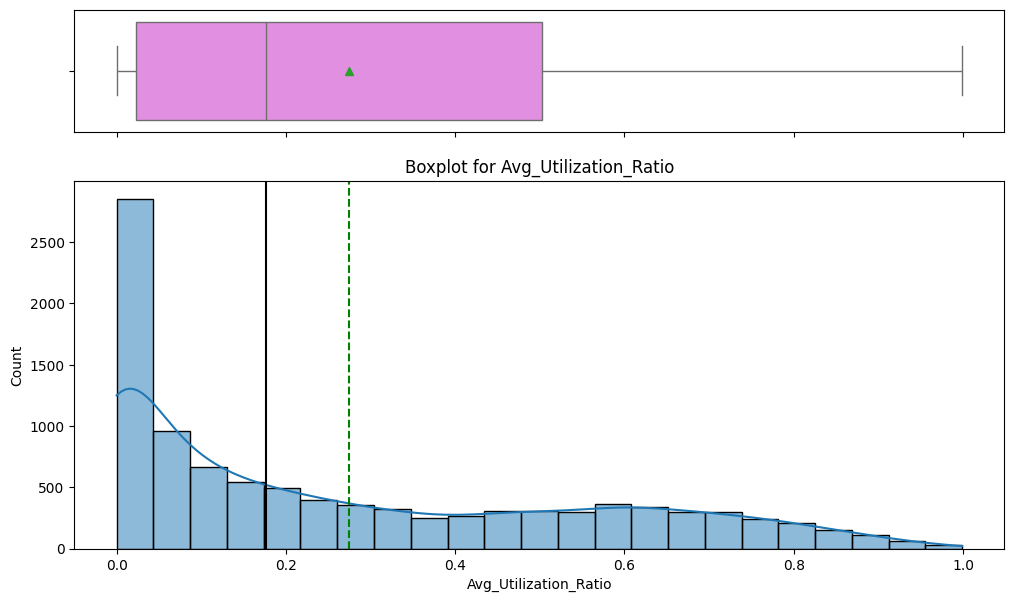

In [17]:
# Basic data pre-processing for analysis

df = df.drop(["CLIENTNUM"], axis=1)
# Move into 0s and 1s
df["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)
df["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)


## Univariate analysis

numerical_columns = df.select_dtypes(include='number').columns.tolist()
categorical_columns = df.select_dtypes(include='object').columns.tolist()


# Create a boxplot for each column in a for loop
for column in numerical_columns:
    plt.figure()  # Create a new figure for each boxplot
    histogram_boxplot(df,column)
    plt.title(f'Boxplot for {column}')

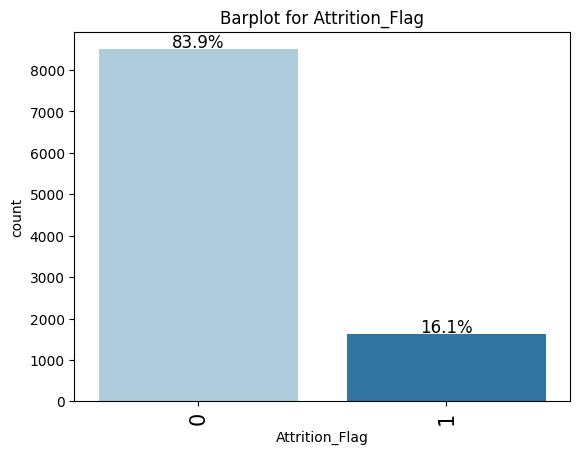

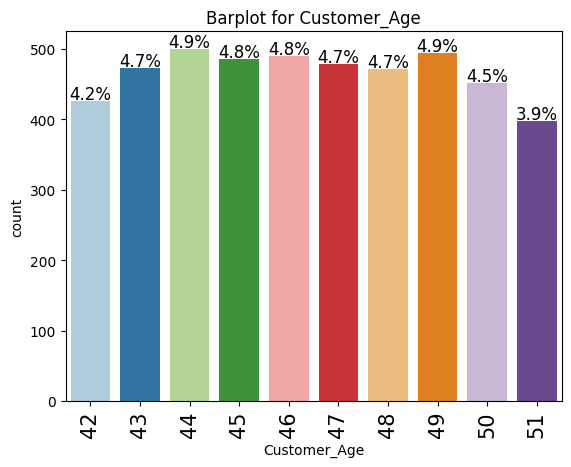

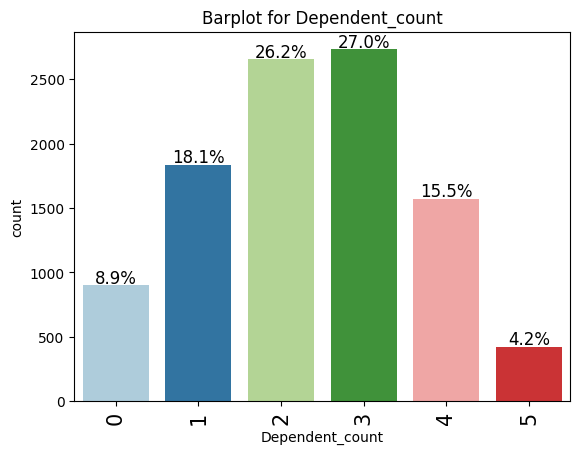

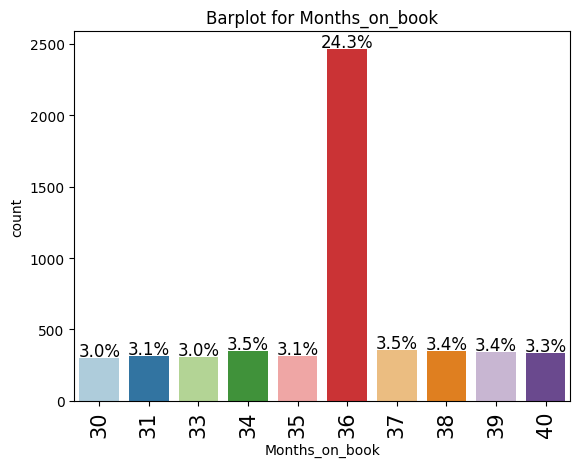

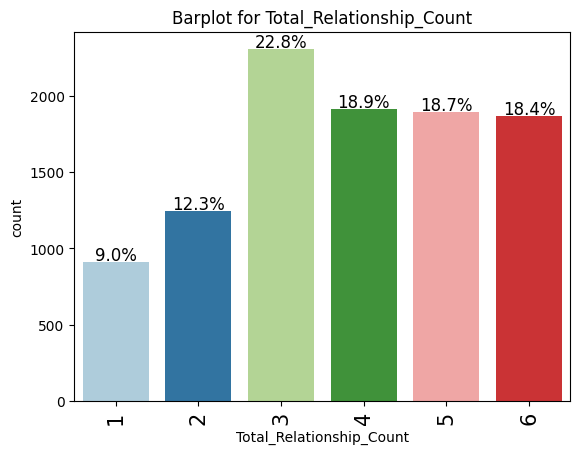

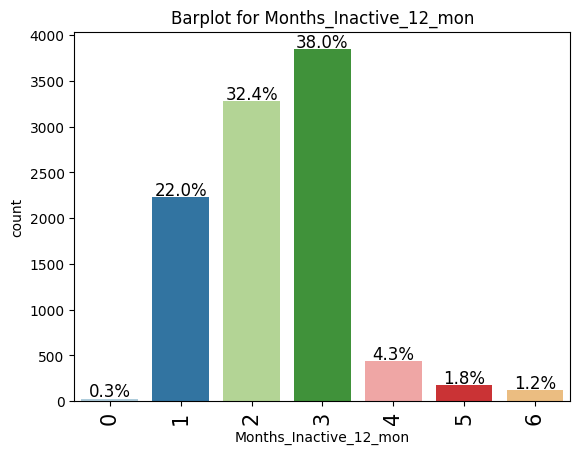

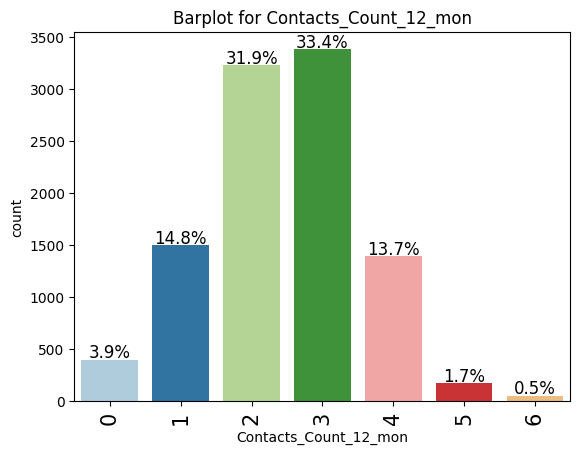

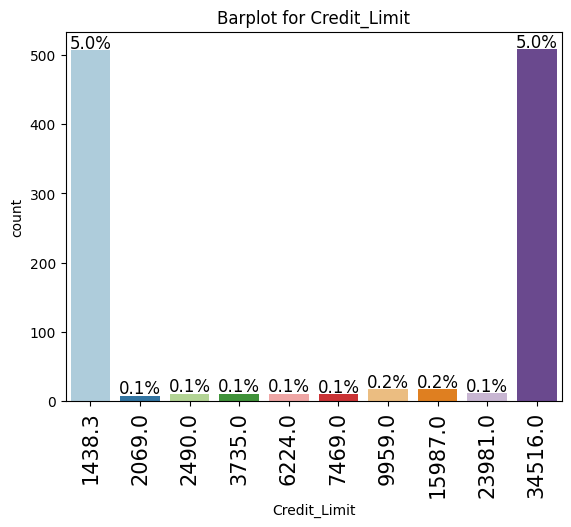

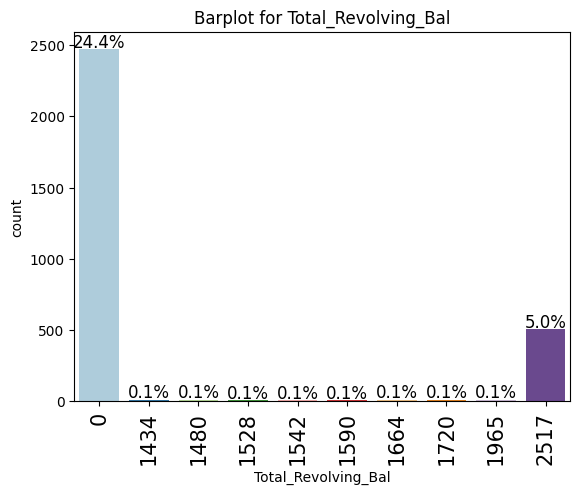

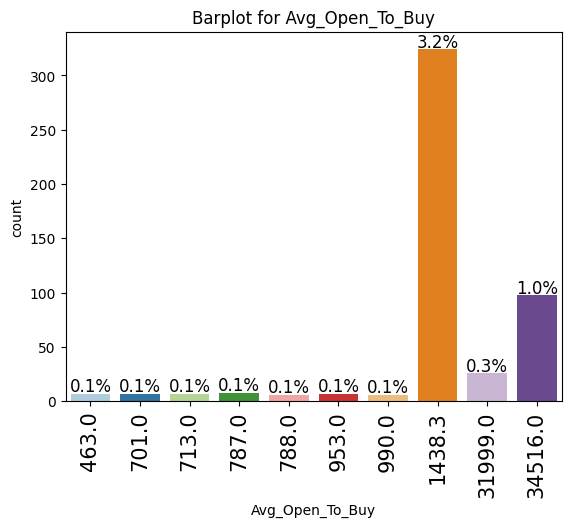

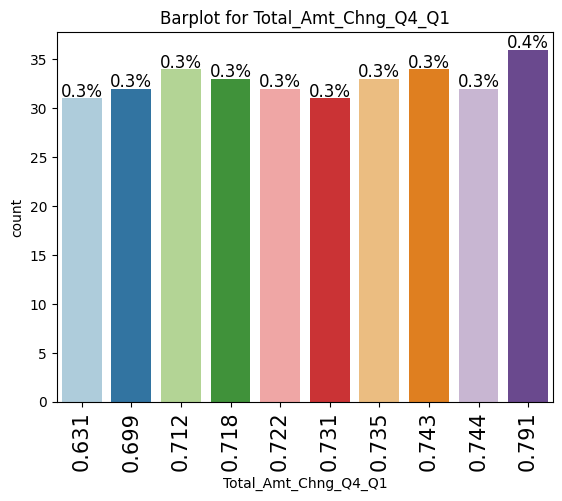

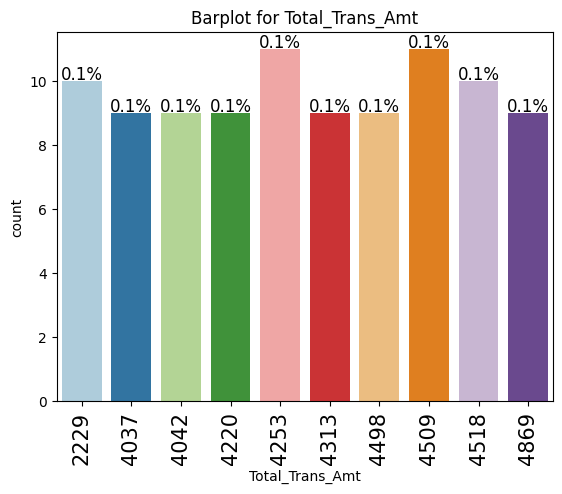

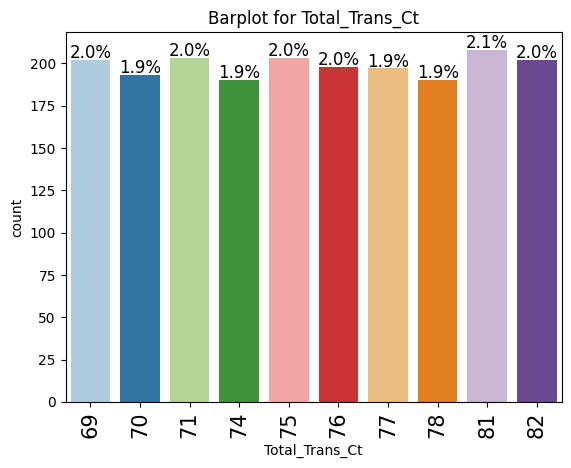

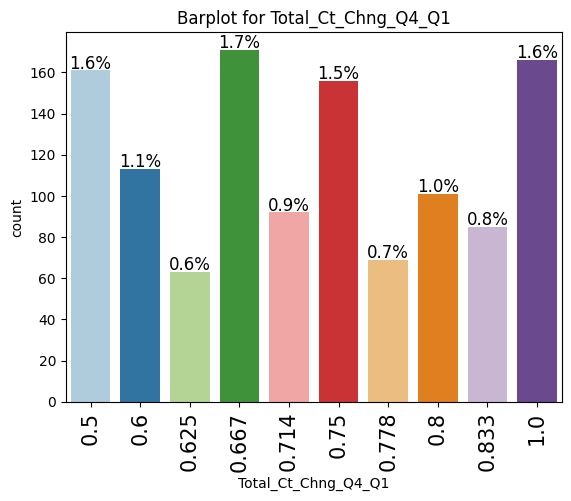

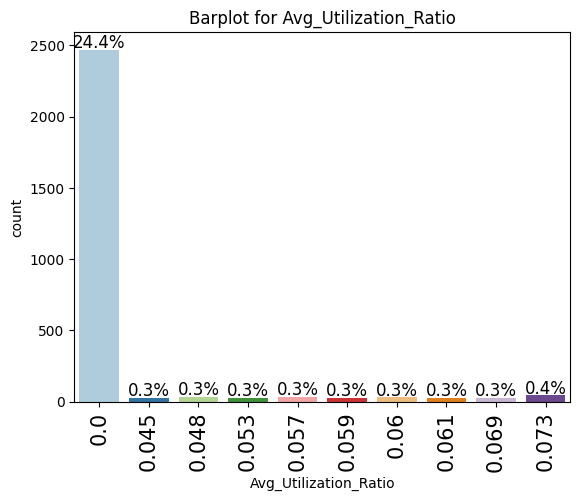

In [18]:
for column in numerical_columns:
    plt.figure()  # Create a new figure for each boxplot
    plt.title(f'Barplot for {column}')
    labeled_barplot(df, column, perc=True, n=10)

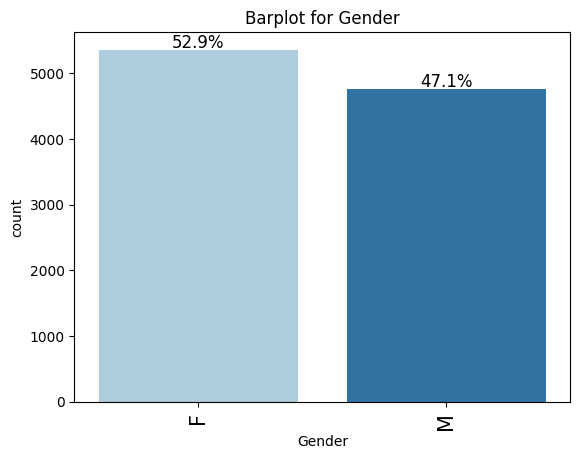

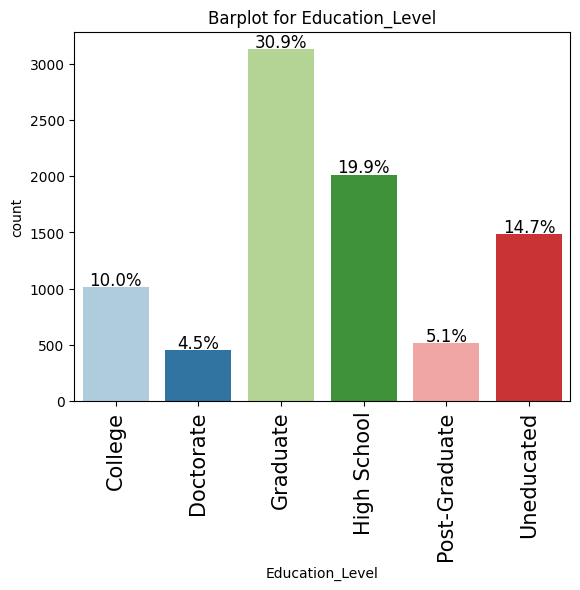

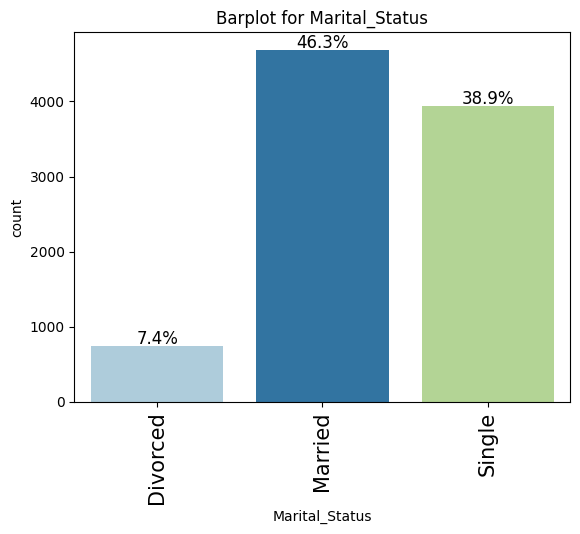

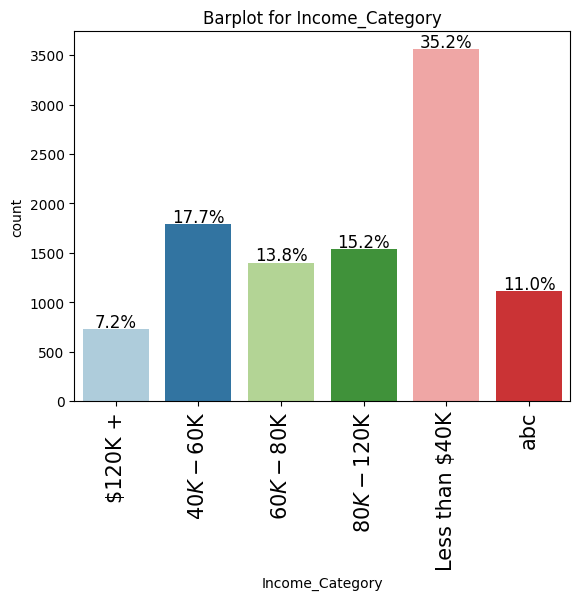

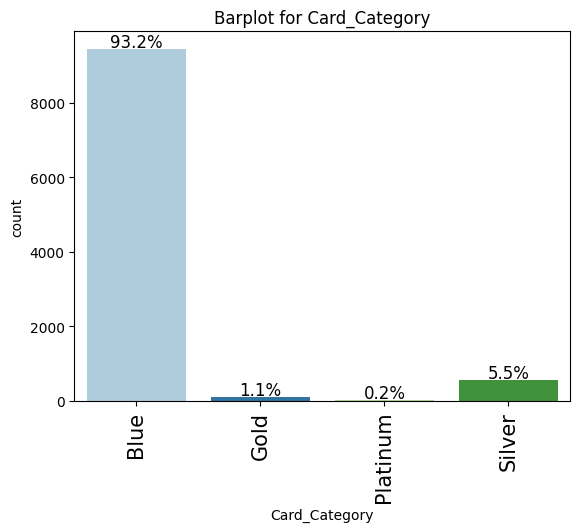

In [19]:

# Repeat for categorical columns
for column in categorical_columns:
    plt.figure()  # Create a new figure for each boxplot
    plt.title(f'Barplot for {column}')
    labeled_barplot(df, column, perc=True, n=10)

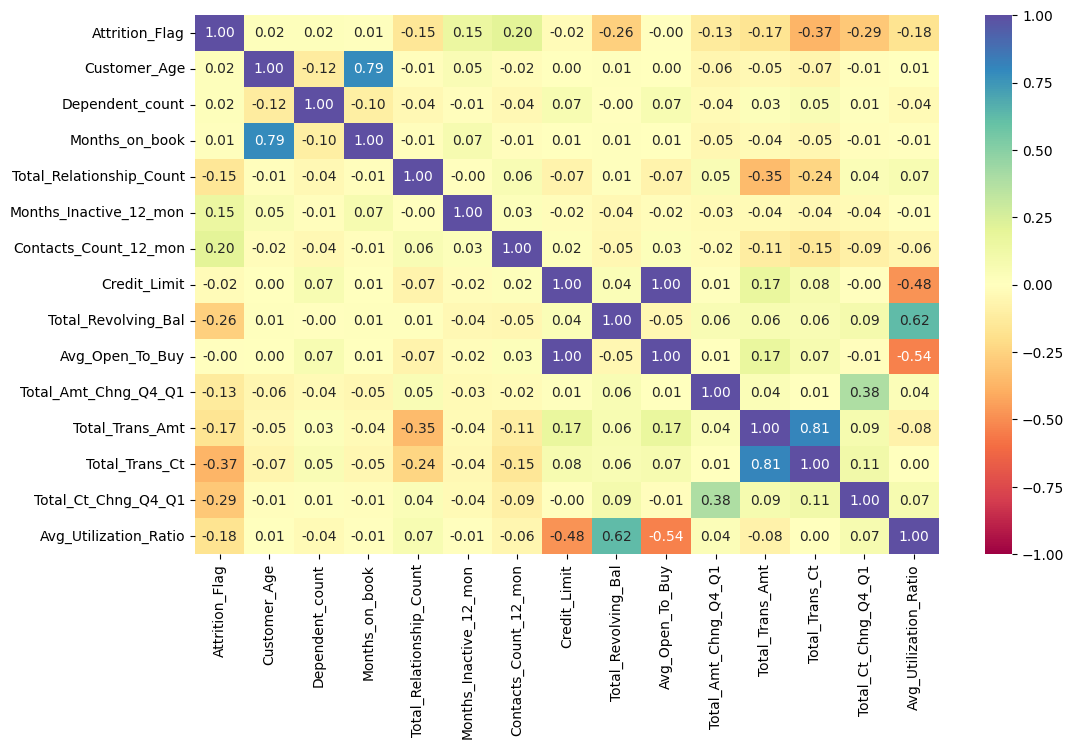

In [20]:
#Bivariate

cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    #Cust_Data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

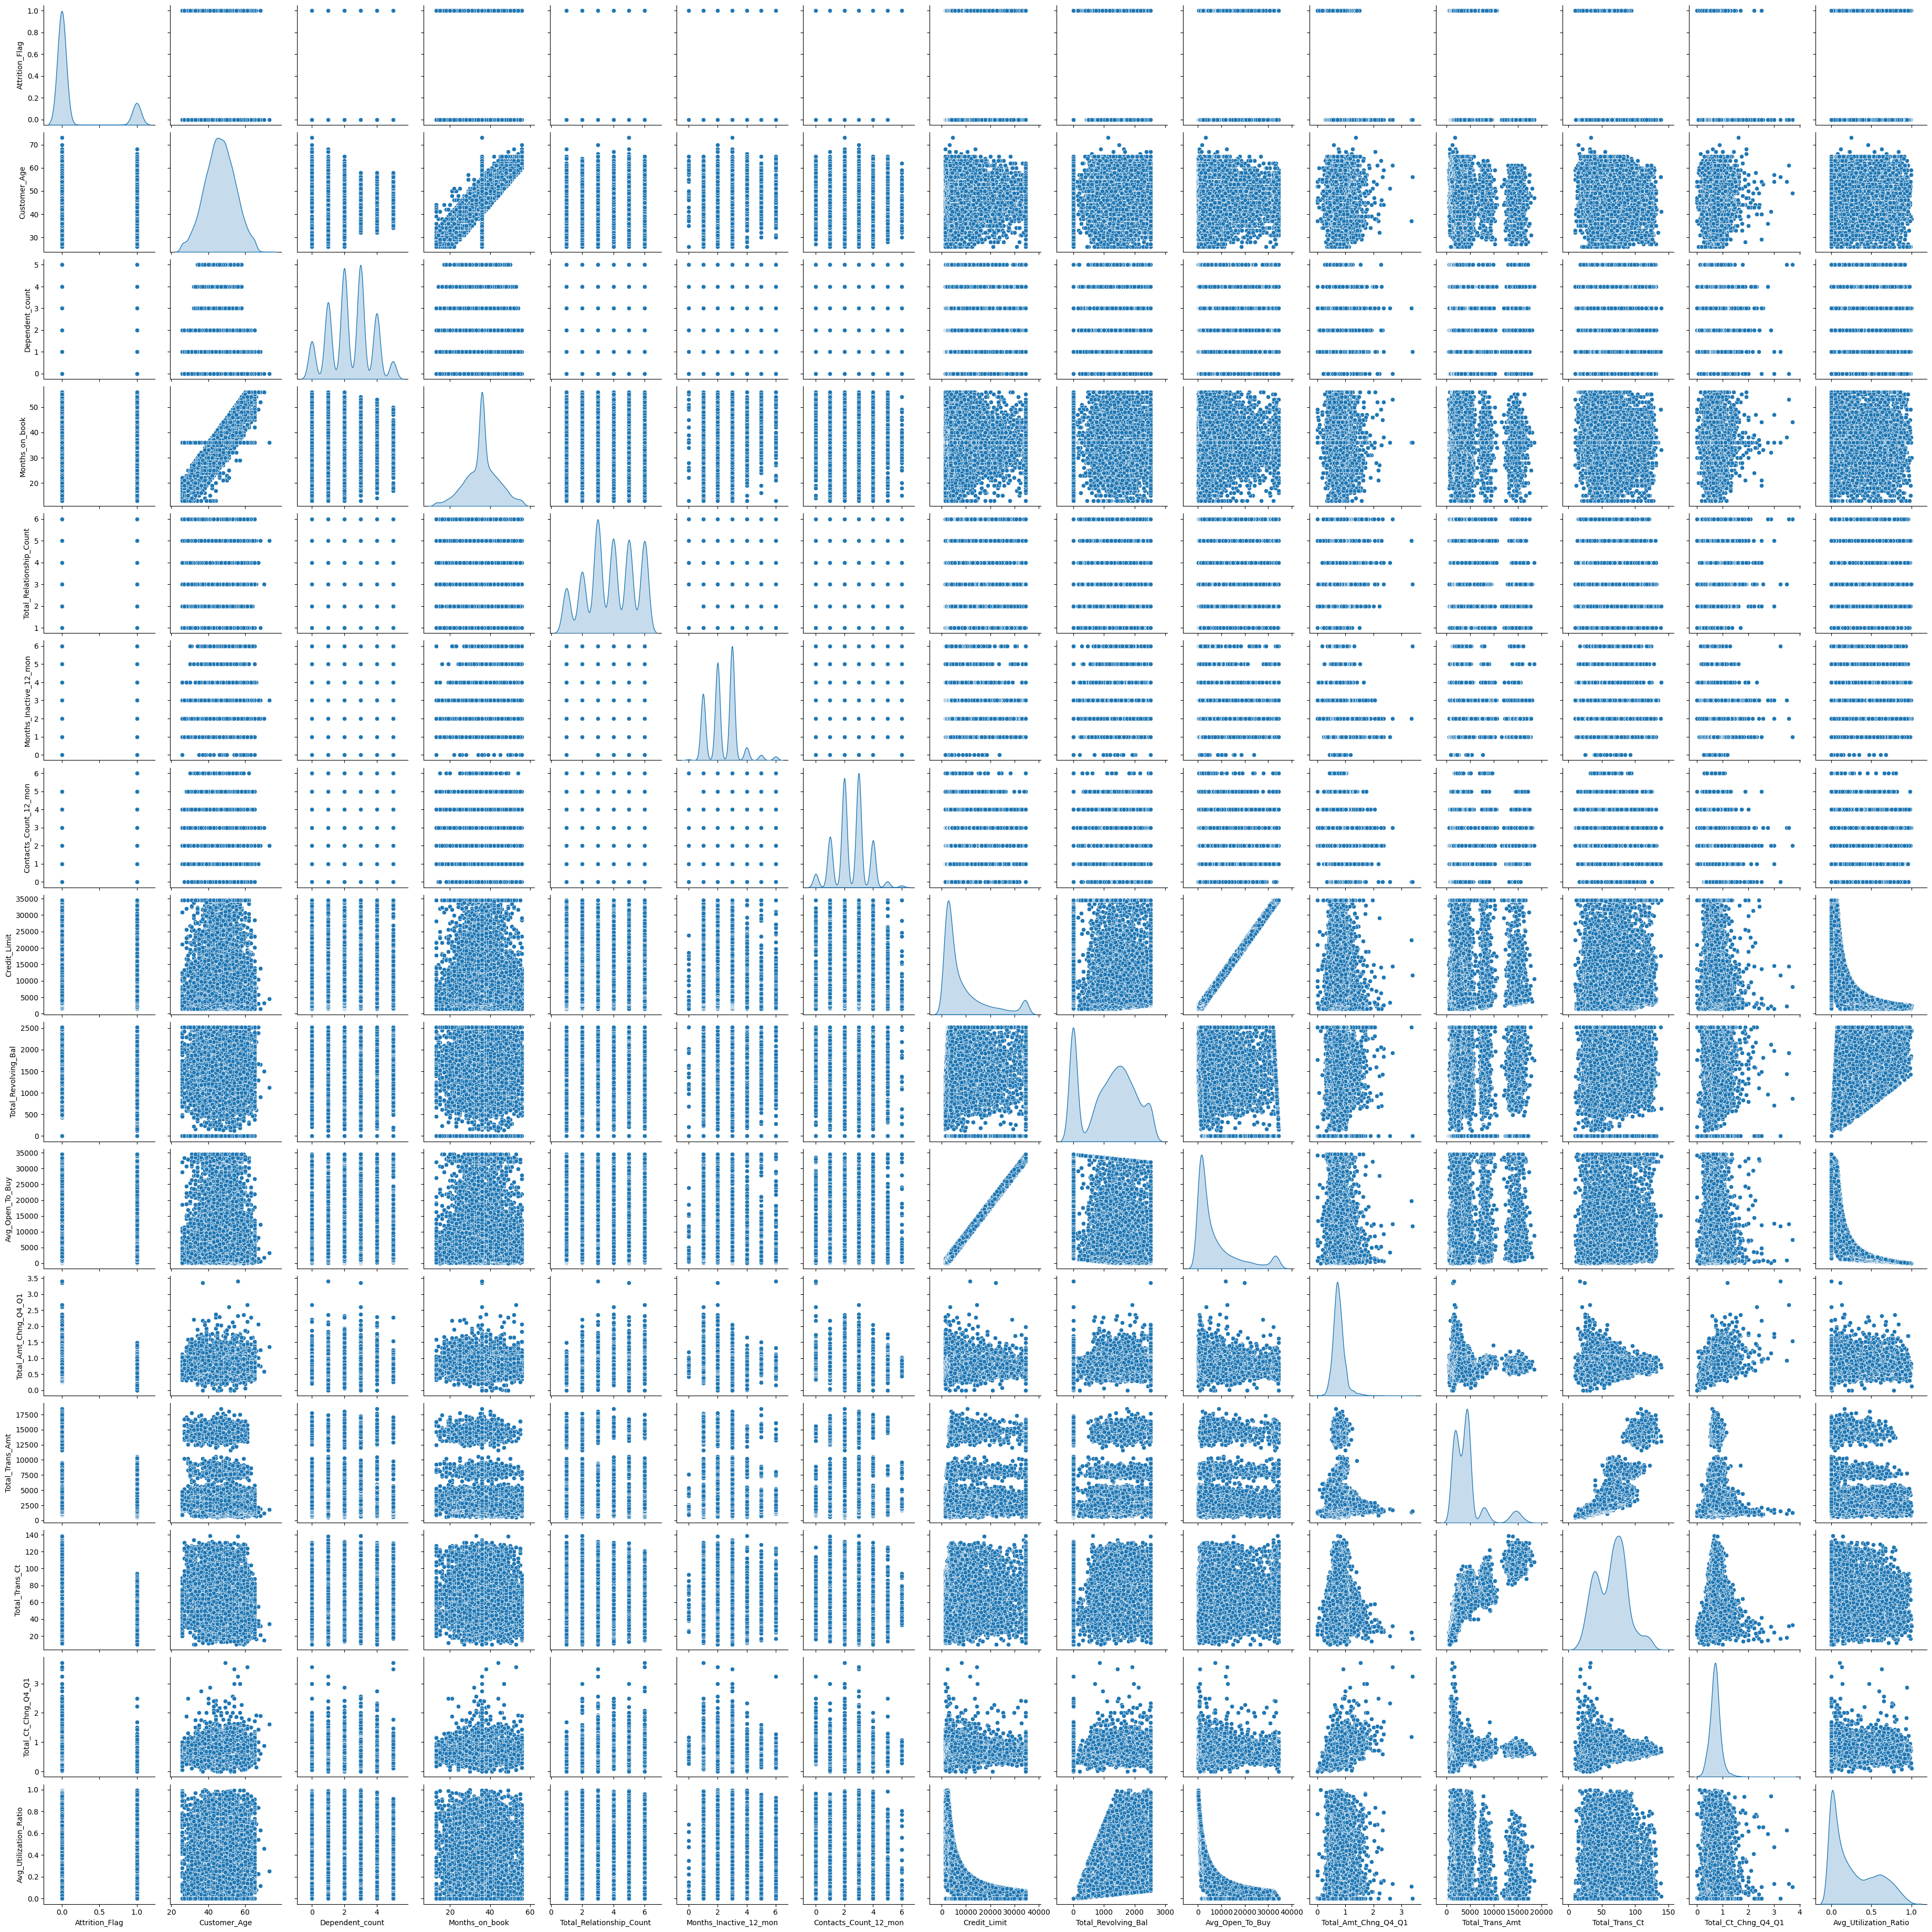

In [21]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()


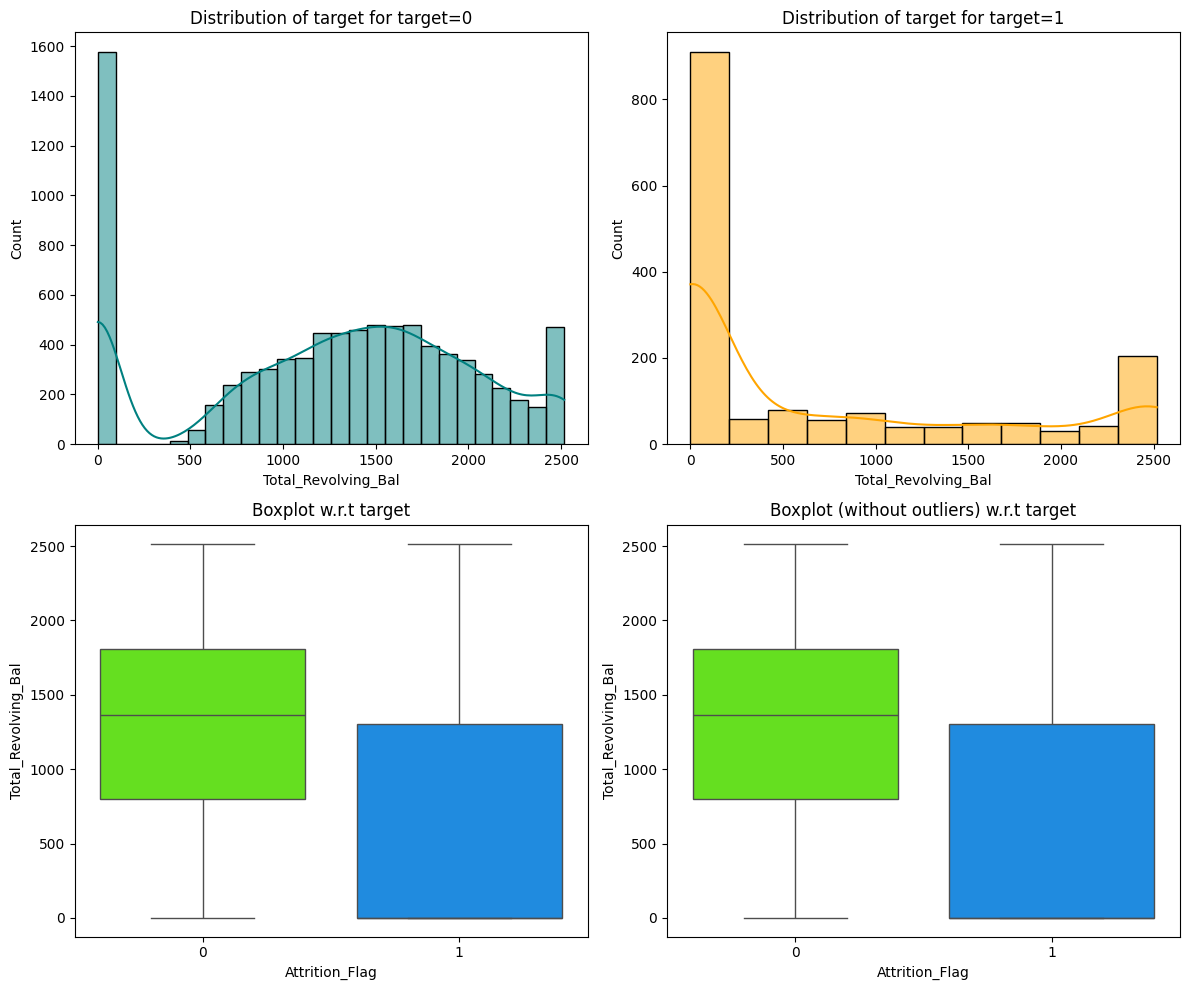

In [22]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

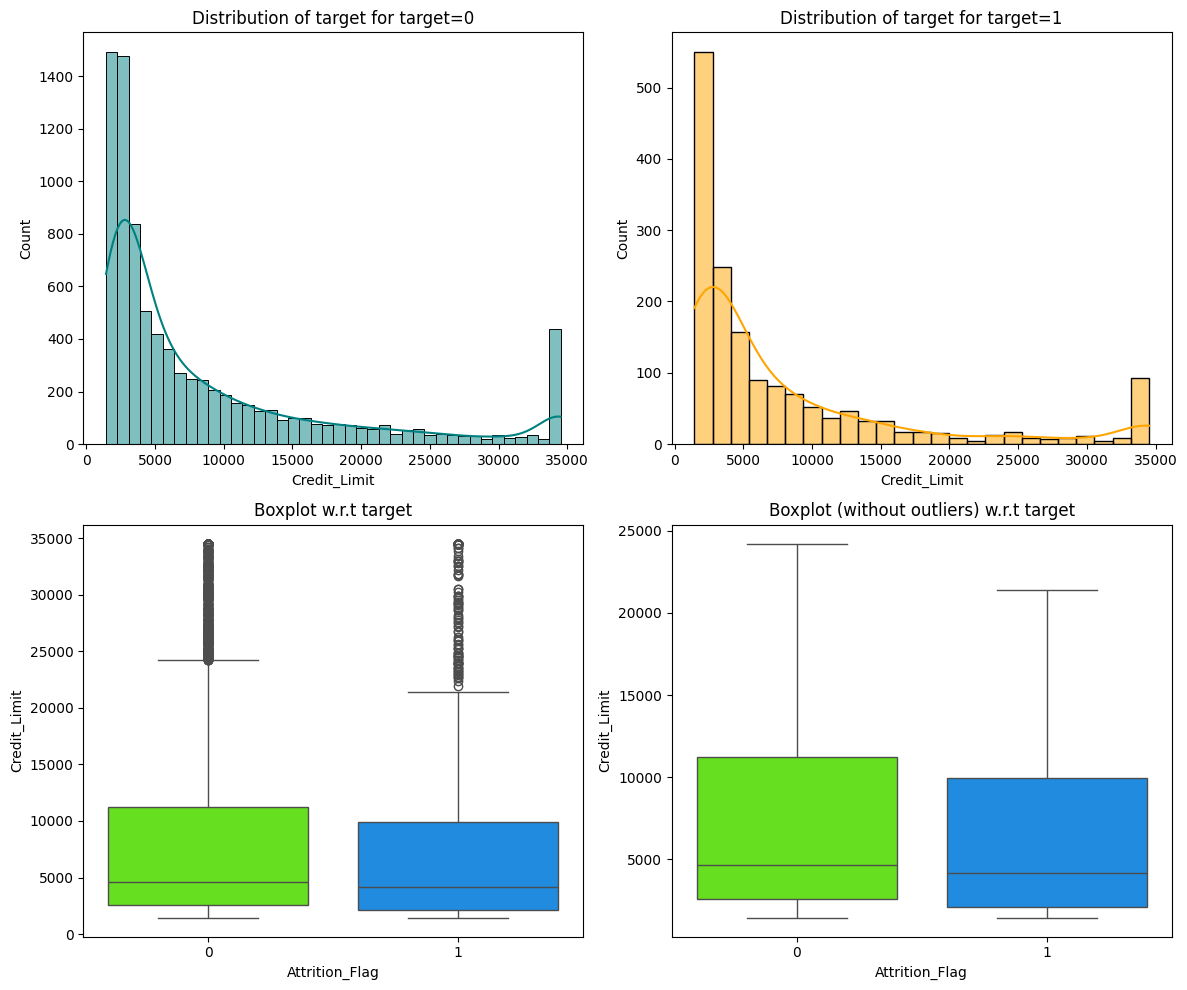

In [23]:
distribution_plot_wrt_target(df, "Credit_Limit", "Attrition_Flag")

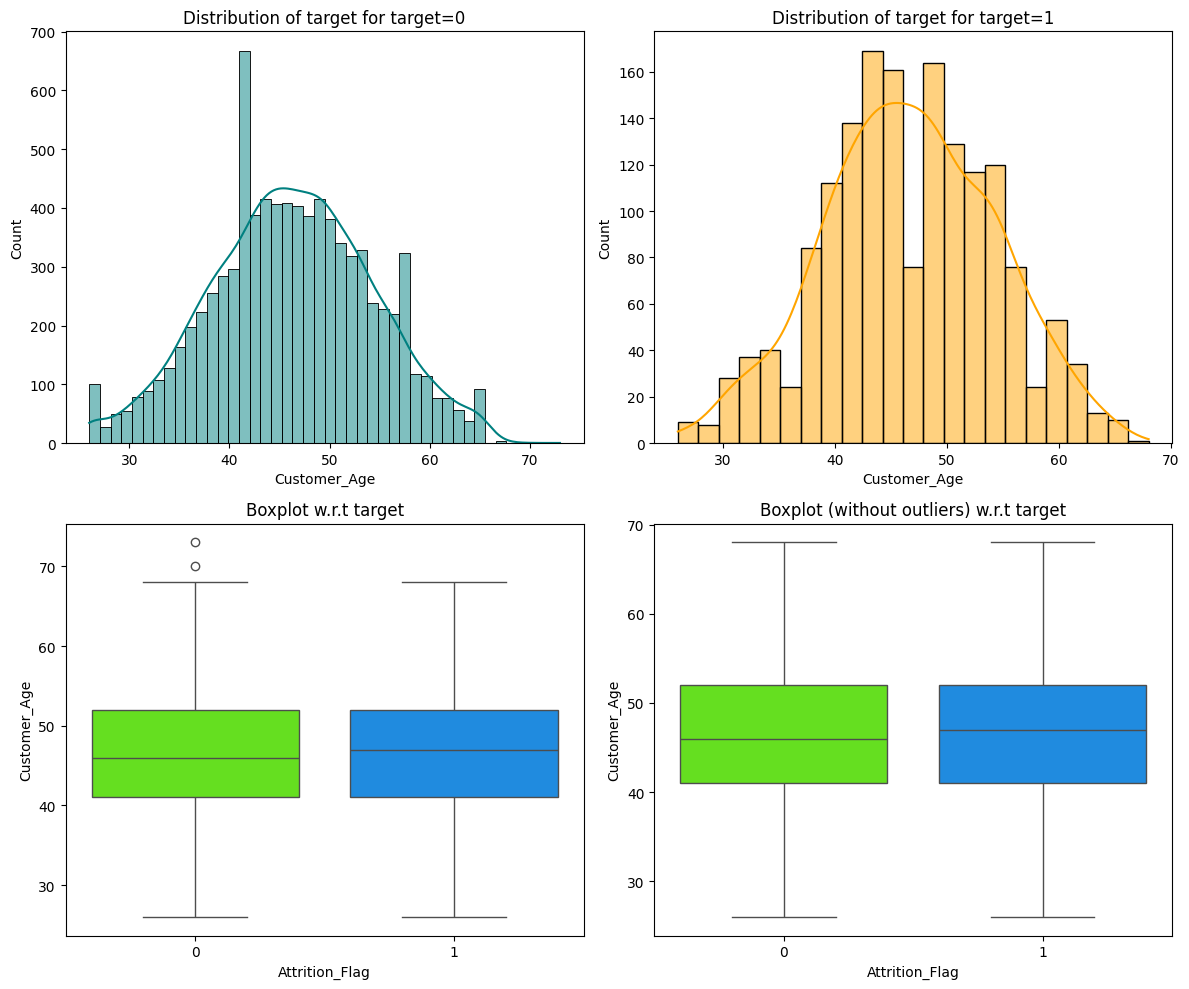

In [24]:
distribution_plot_wrt_target(df, "Customer_Age", "Attrition_Flag")

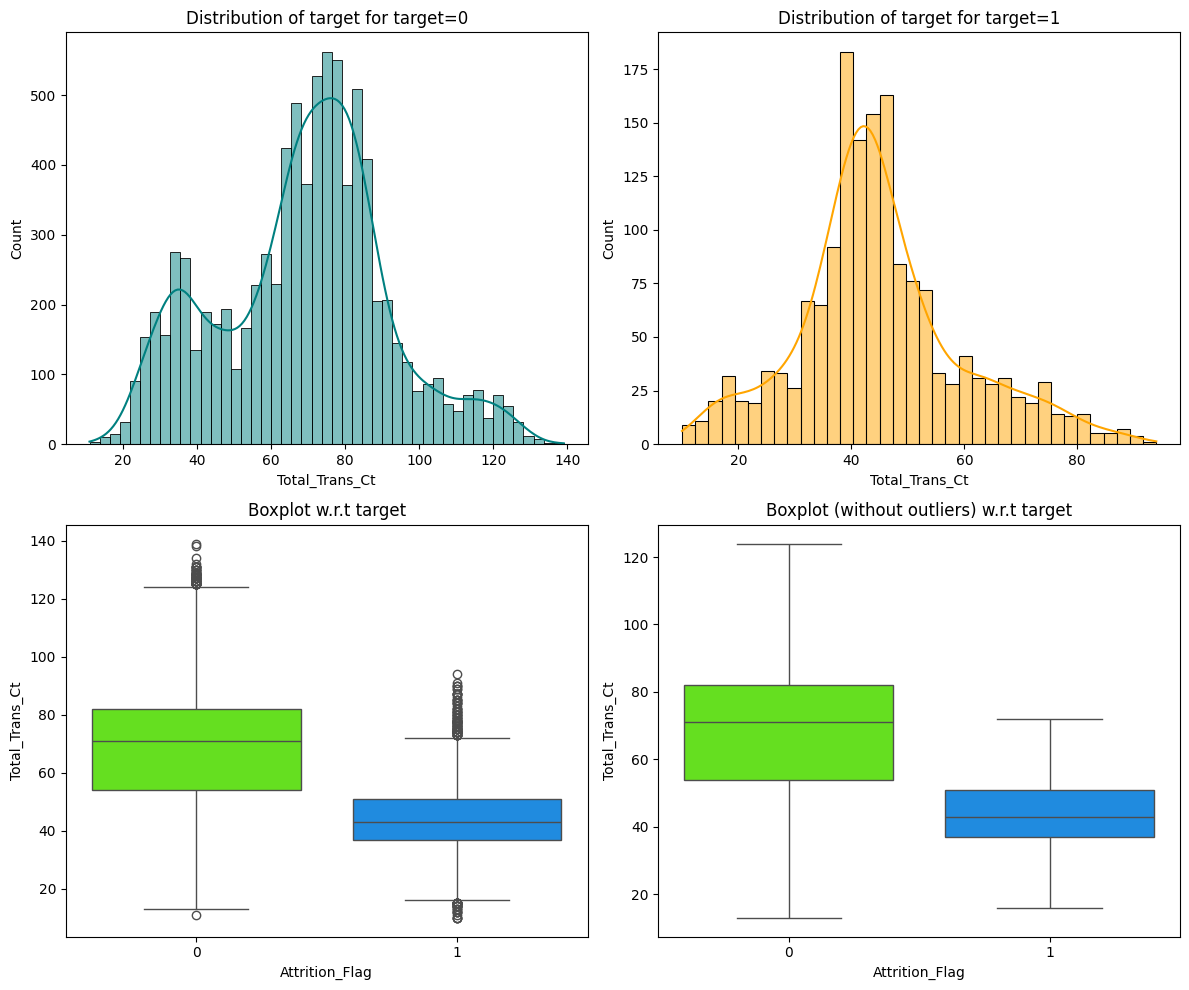

In [25]:
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag")

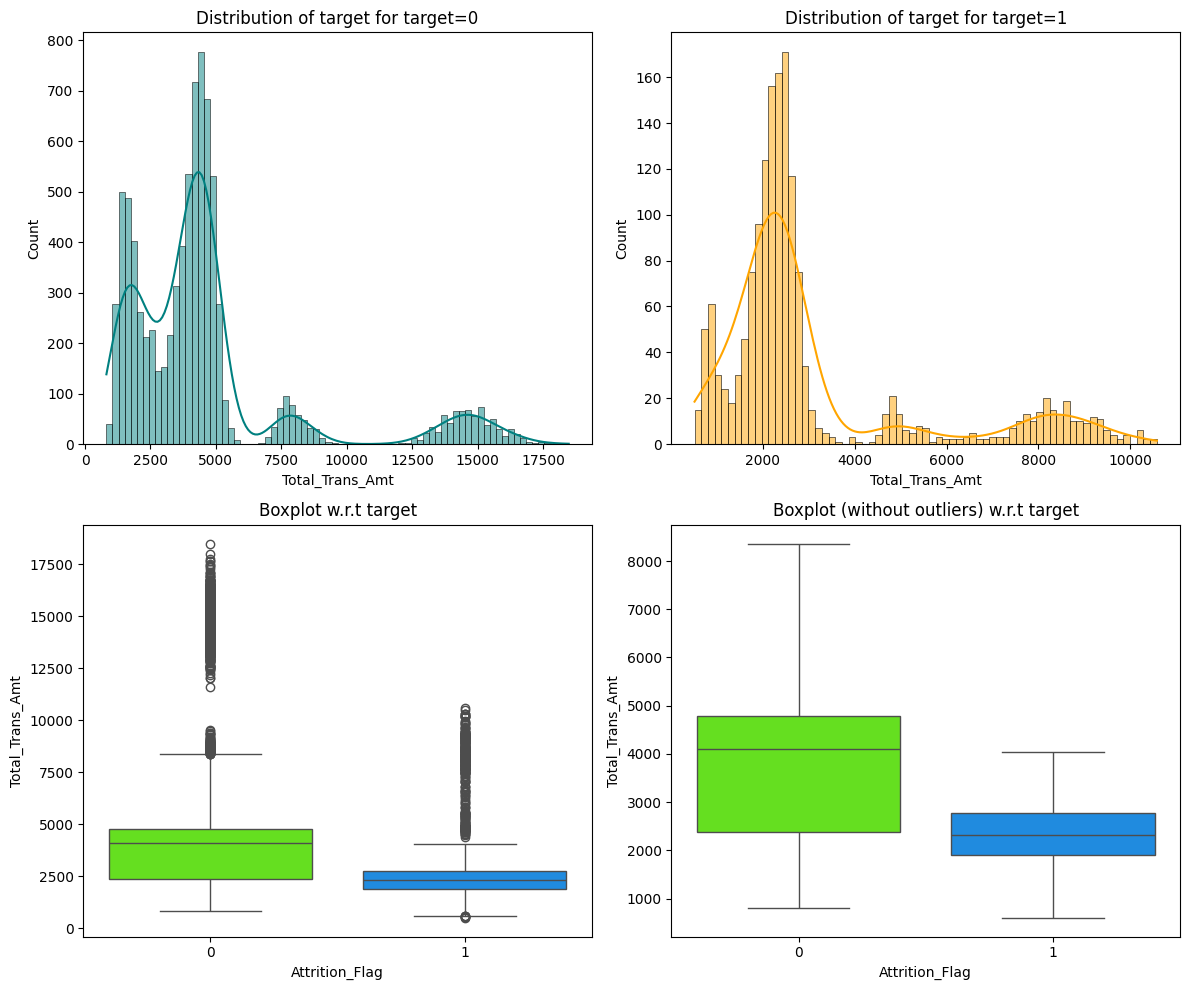

In [26]:
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag")

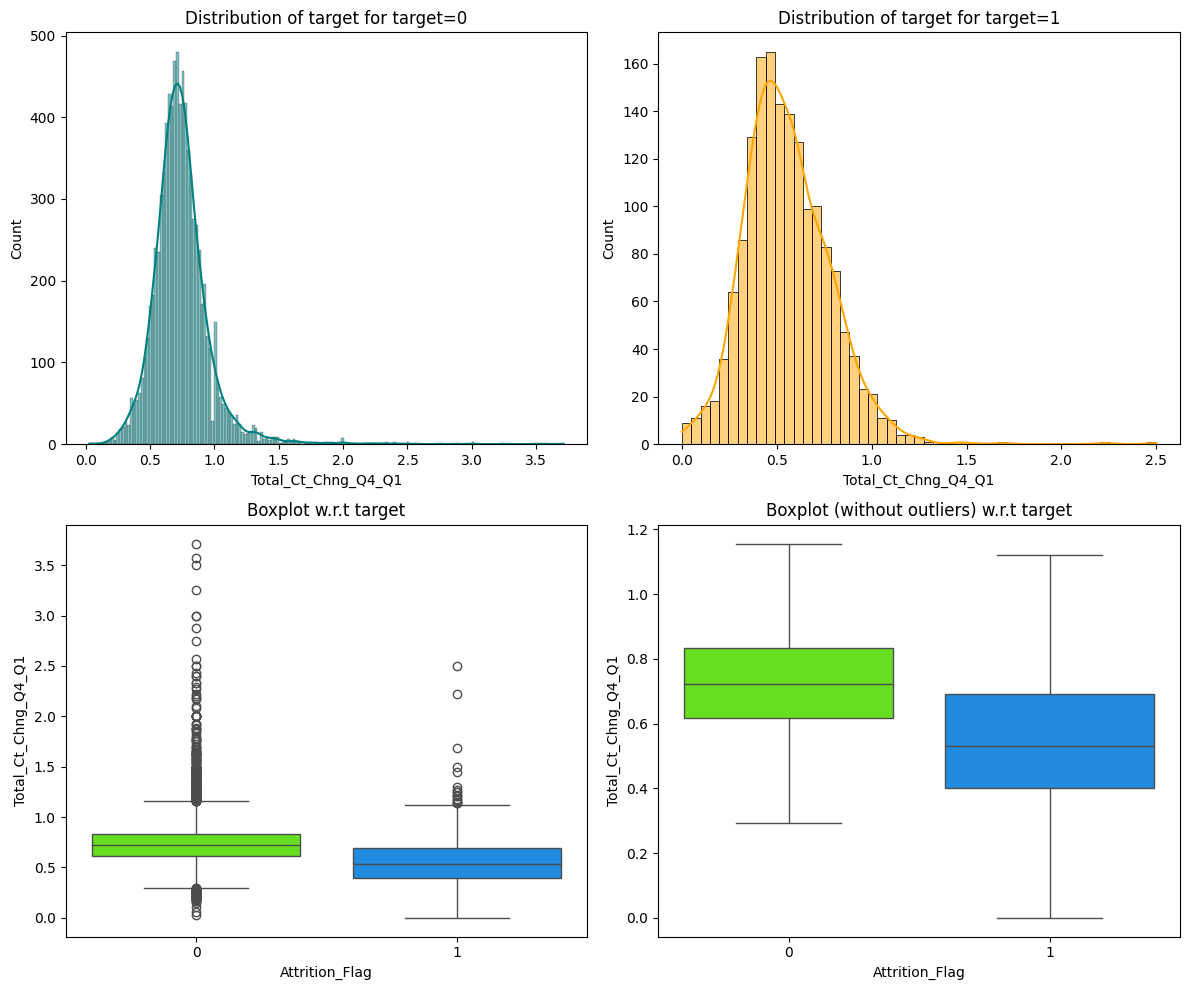

In [27]:
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

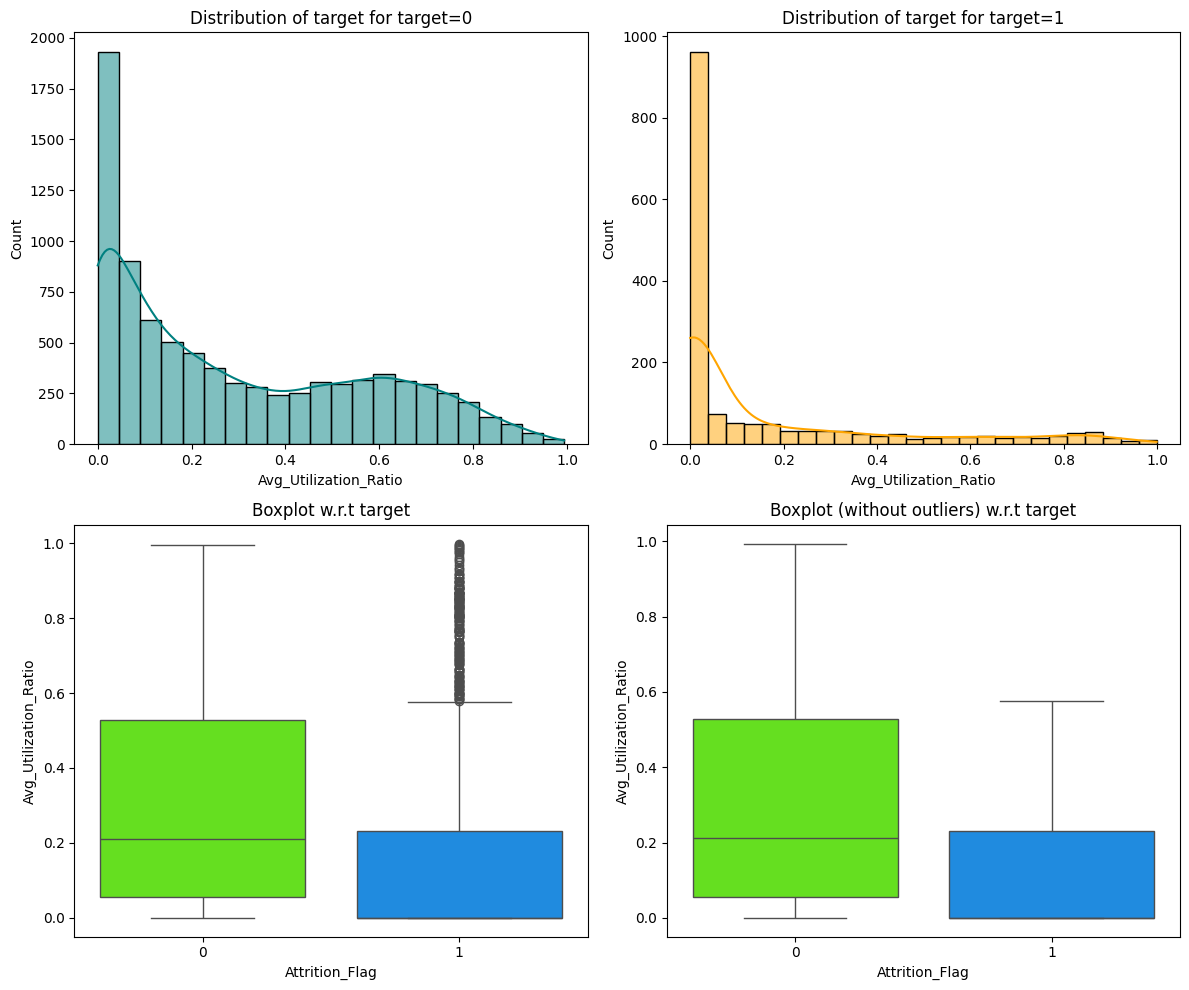

In [28]:
distribution_plot_wrt_target(df, "Avg_Utilization_Ratio", "Attrition_Flag")

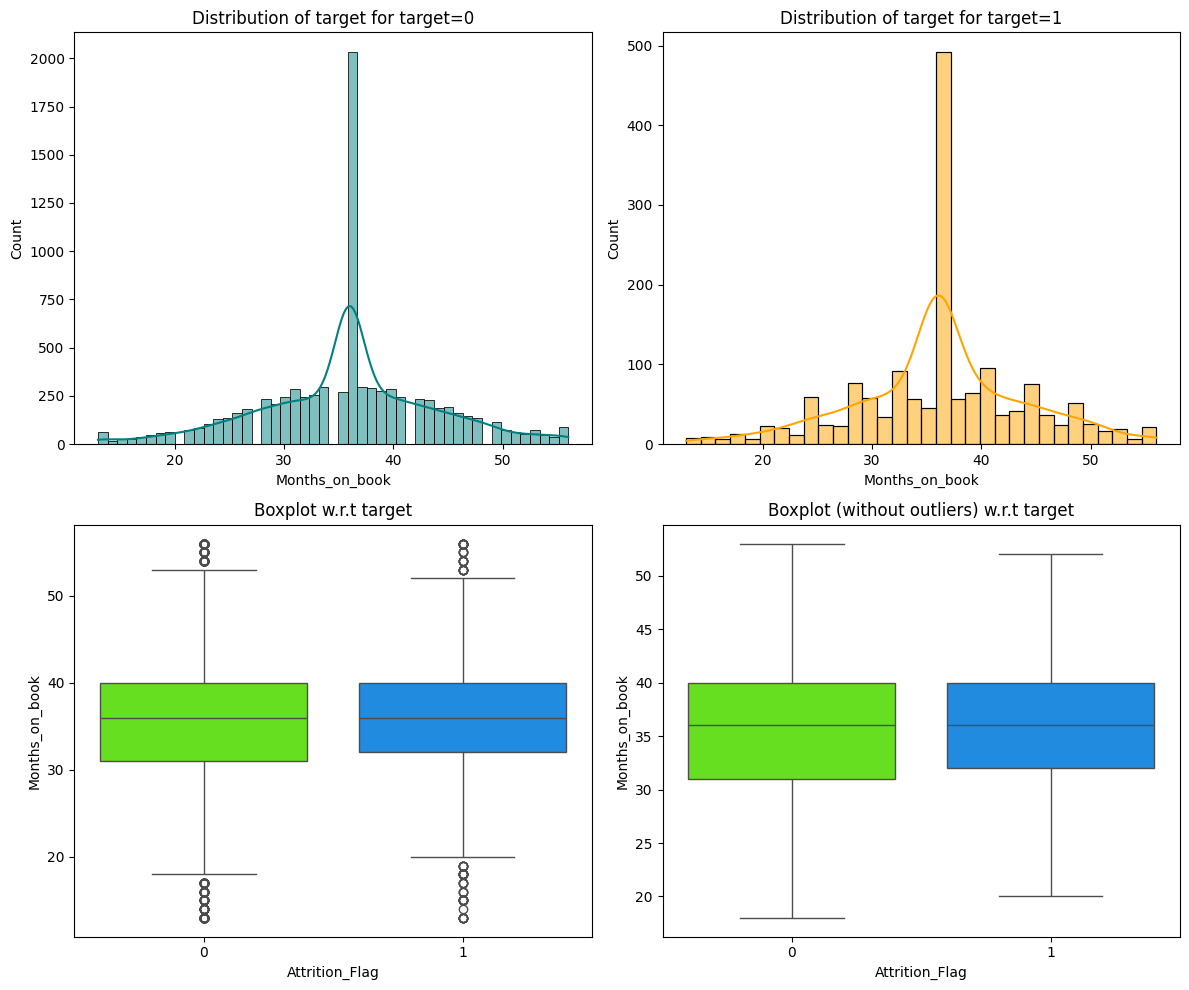

In [29]:
distribution_plot_wrt_target(df, "Months_on_book", "Attrition_Flag")

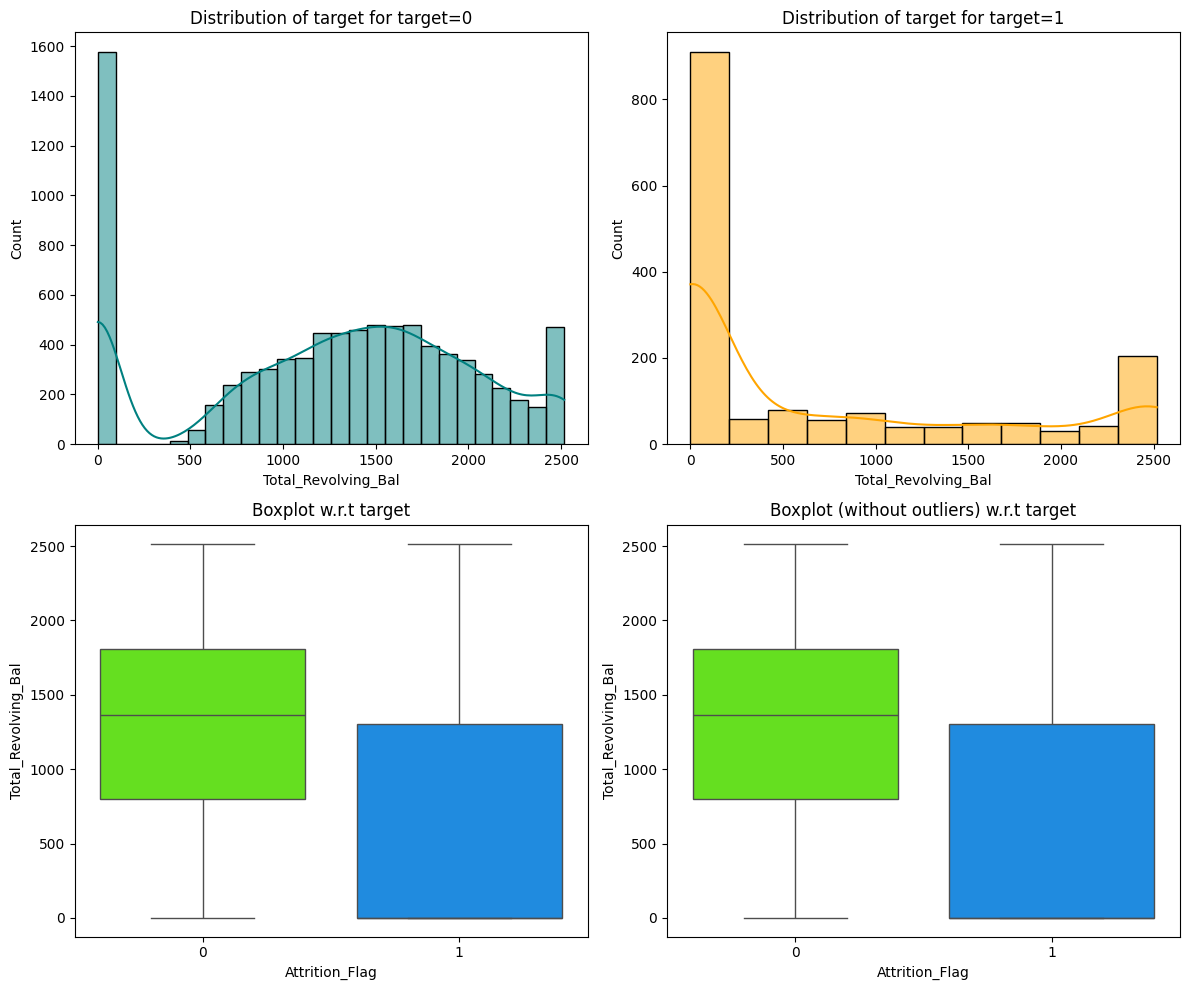

In [30]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

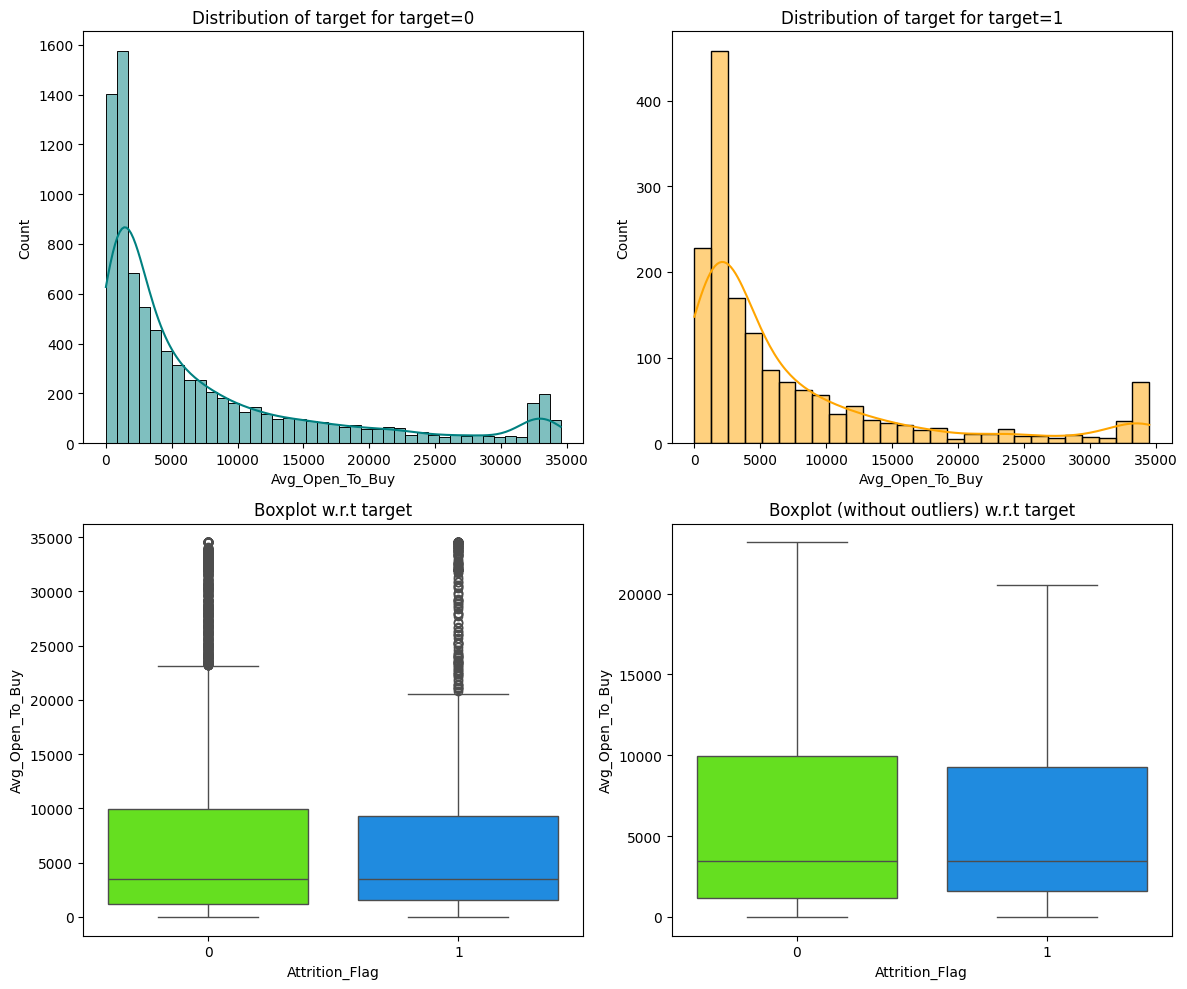

In [31]:
distribution_plot_wrt_target(df, "Avg_Open_To_Buy", "Attrition_Flag")

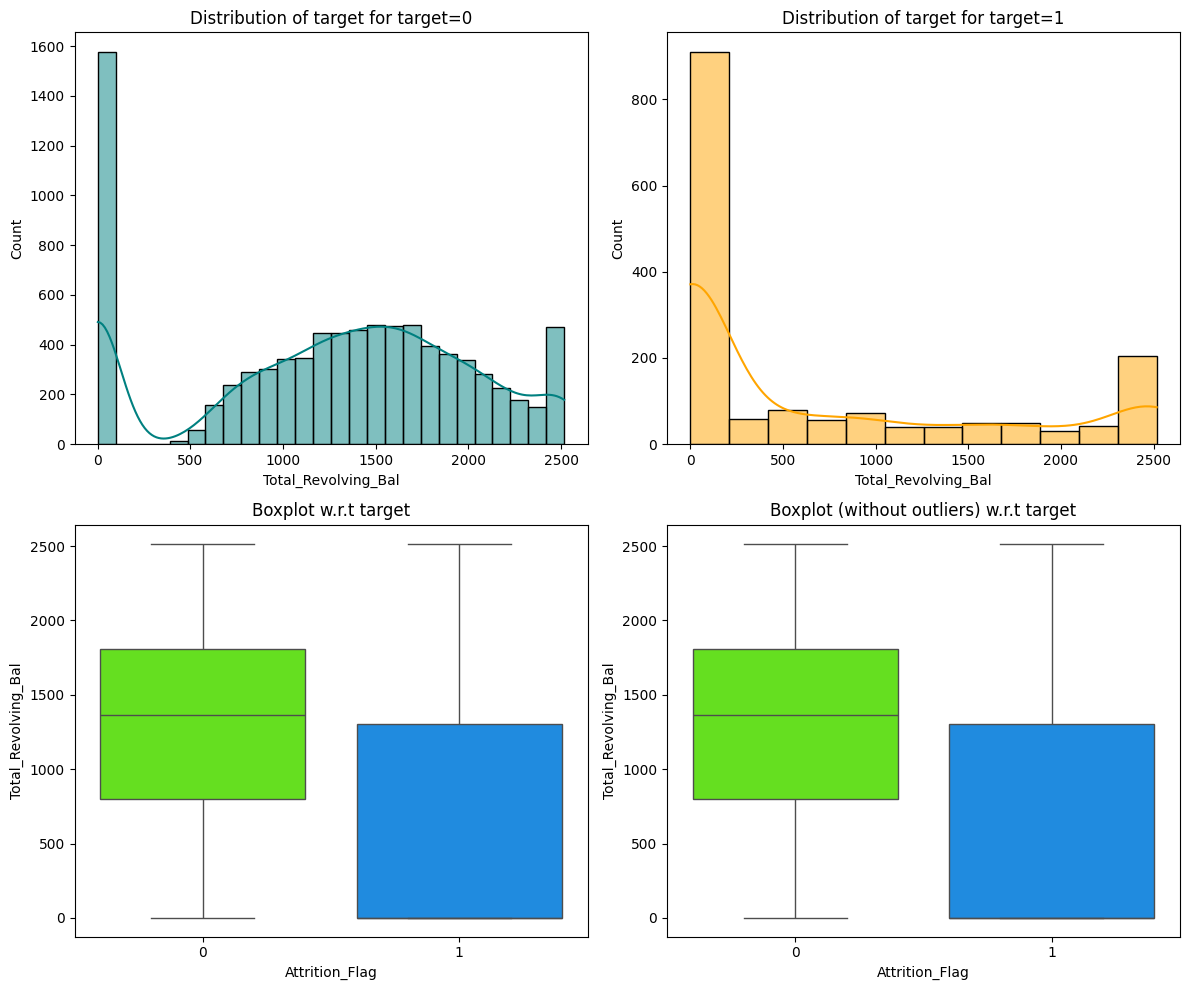

In [32]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


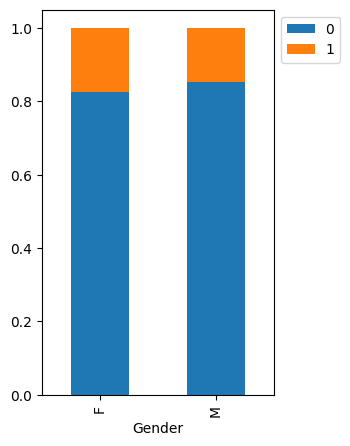

In [33]:
stacked_barplot(df, "Gender", "Attrition_Flag")

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


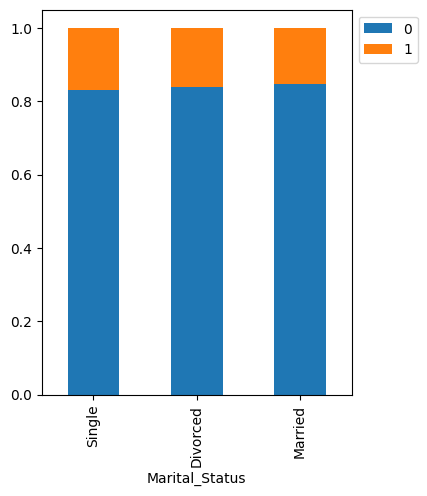

In [34]:
stacked_barplot(df, "Marital_Status", "Attrition_Flag")

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


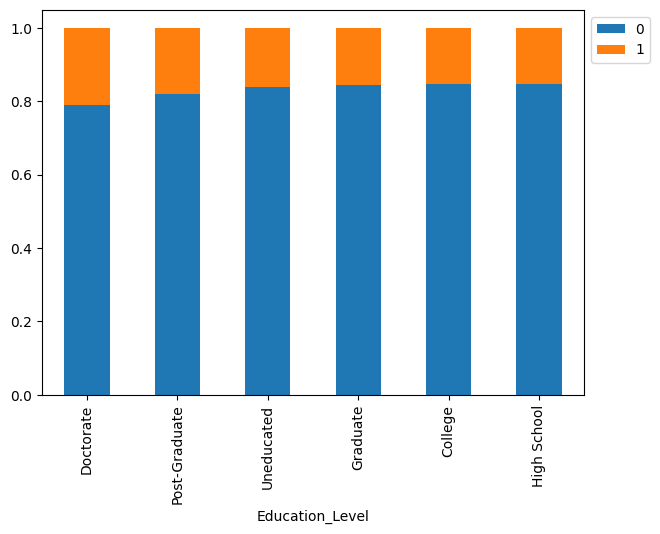

In [35]:
stacked_barplot(df, "Education_Level", "Attrition_Flag")

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


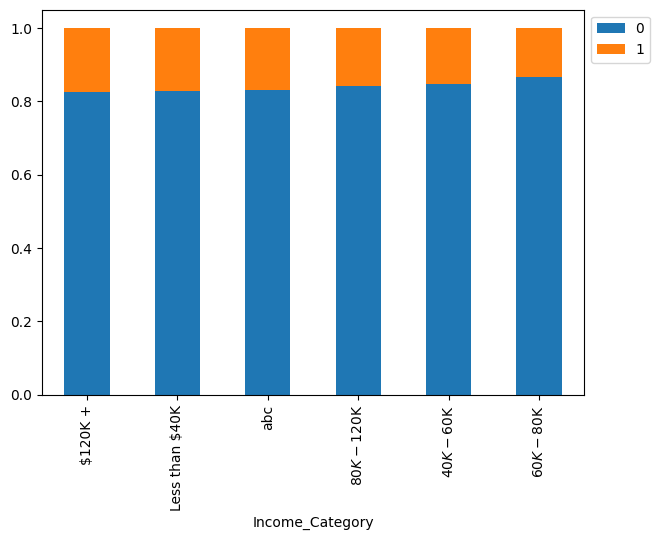

In [36]:
stacked_barplot(df, "Income_Category", "Attrition_Flag")

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


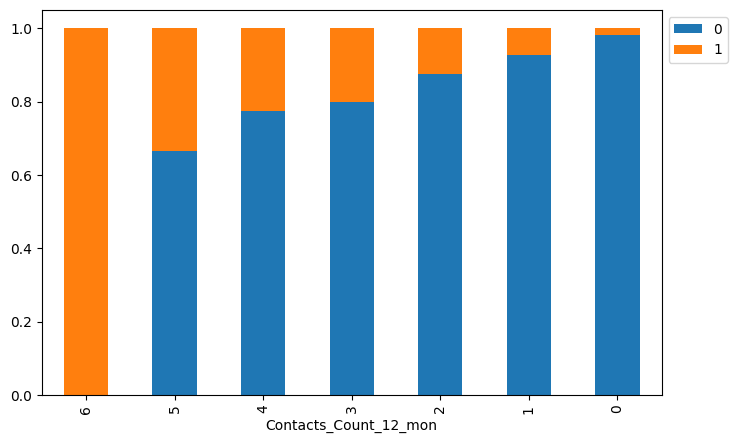

In [37]:
stacked_barplot(df, "Contacts_Count_12_mon", "Attrition_Flag")

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


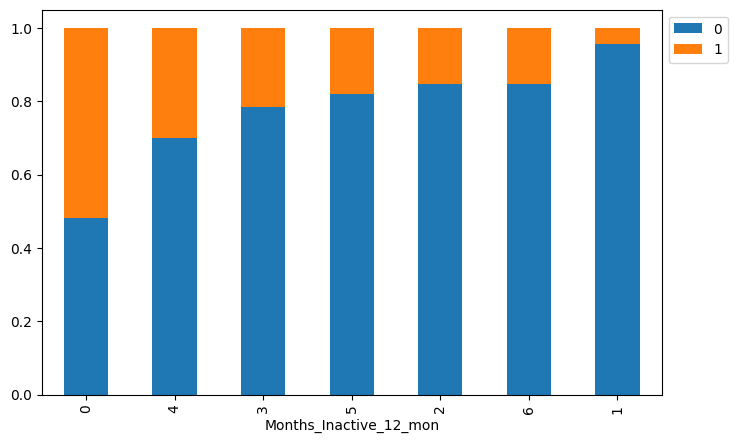

In [38]:
stacked_barplot(df, "Months_Inactive_12_mon", "Attrition_Flag")

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


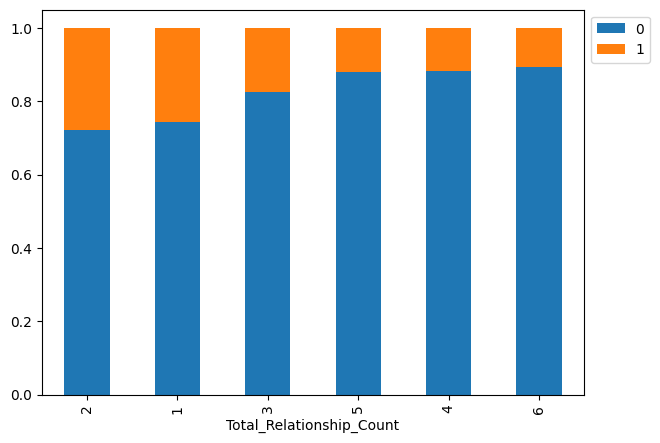

In [39]:
stacked_barplot(df, "Total_Relationship_Count", "Attrition_Flag")

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


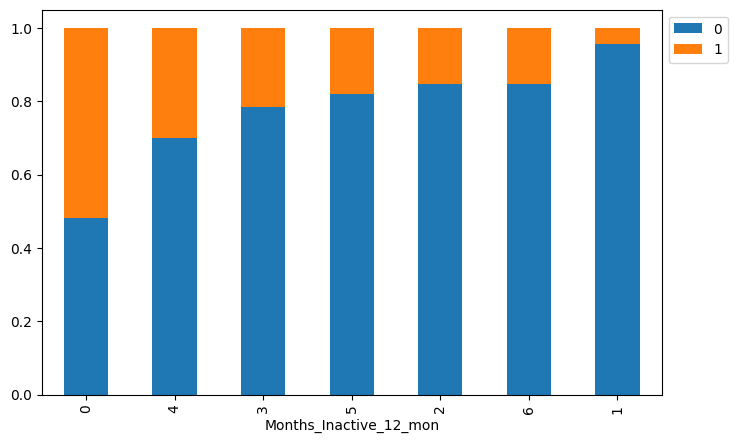

In [40]:
stacked_barplot(df, "Months_Inactive_12_mon", "Attrition_Flag")

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


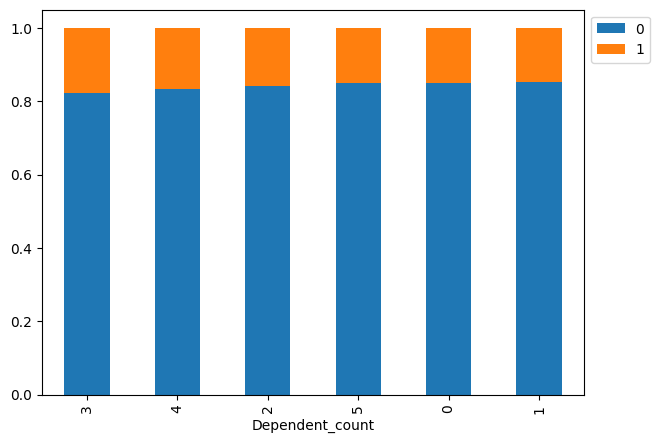

In [41]:
stacked_barplot(df, "Dependent_count", "Attrition_Flag")

## Data Pre-processing

In [42]:

# Before using Iterative Imputer, convert object -> category datatype

# Convert object-type columns to the category datatype - to make it computationally-effective
for col in cat_col:
    df[col] = df[col].astype('category')
# Can drop Avg_Open_to_Buy since it is 100% correlated with Credit_Limit as seen in the heat_map.
X = df.drop(["Avg_Open_To_Buy"], axis=1)
# Removed CLIENTNUM as it's useless
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

## Missing value imputation




In [43]:
# Replace abc with NAN -- DO BEFORE SPLIT
df["Income_Category"].replace('abc', np.nan, inplace=True)

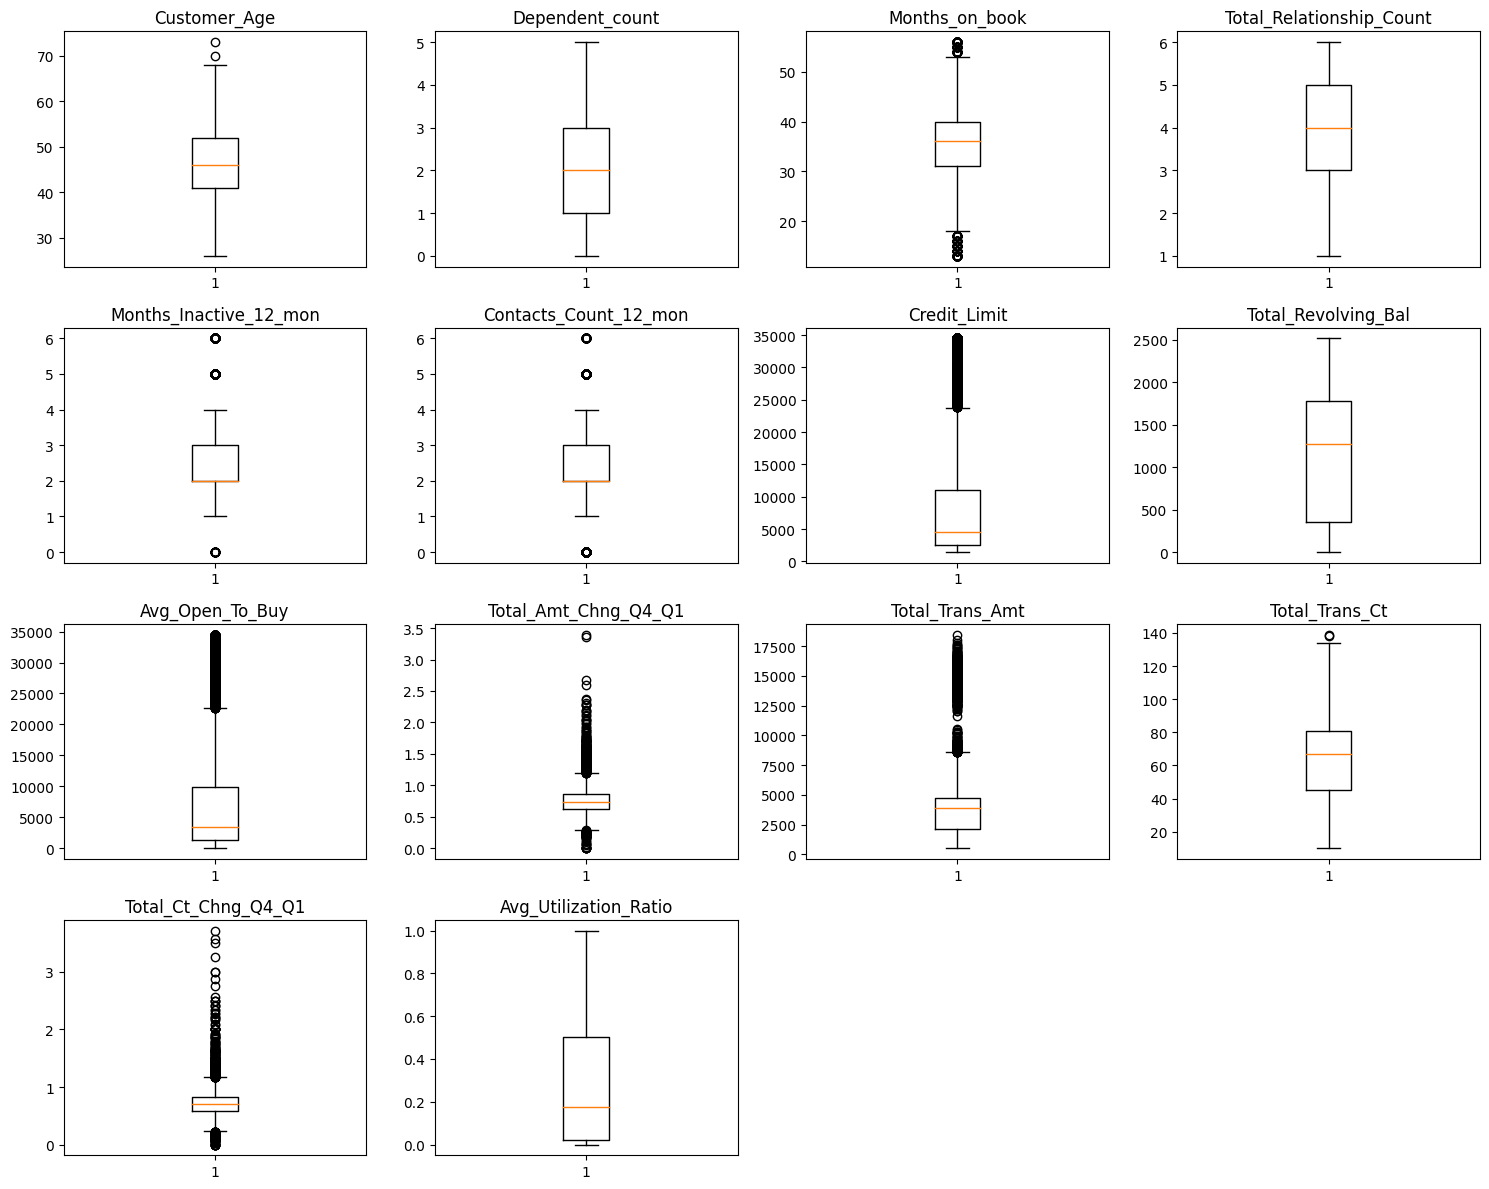

In [44]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [45]:
# Check for OUTLIERS MUST  be done before data split

## Check for Outliers
## if cannot be dropped,just use any transformations such as log or square root
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# 75%-25%
IQR = Q3 - Q1

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

# checking the % outliers
print(((df.select_dtypes(include=["float64", "int64"]) < lower) | (df.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(df) * 100)

# Future Improvement: Apply log trasnformations on right-skewed data and sqrt transformations on left-skewed data
# Future: Ensure to do separately on Train, Val and Train datasets . SO do this later


Customer_Age               0.020
Dependent_count            0.000
Months_on_book             3.812
Total_Relationship_Count   0.000
Months_Inactive_12_mon     3.268
Contacts_Count_12_mon      6.211
Credit_Limit               9.717
Total_Revolving_Bal        0.000
Avg_Open_To_Buy            9.509
Total_Amt_Chng_Q4_Q1       3.910
Total_Trans_Amt            8.848
Total_Trans_Ct             0.020
Total_Ct_Chng_Q4_Q1        3.891
Avg_Utilization_Ratio      0.000
dtype: float64


In [46]:
X.head()

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0            45      M                3     High School        Married   
1            49      F                5        Graduate         Single   
2            51      M                3        Graduate        Married   
3            40      F                4     High School            NaN   
4            40      M                3      Uneducated        Married   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K          Blue              39                         5   
1  Less than $40K          Blue              44                         6   
2    $80K - $120K          Blue              36                         4   
3  Less than $40K          Blue              34                         3   
4     $60K - $80K          Blue              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3     12691.000   
1                       1                      2      8256.000   
2                       1                      0      3418.000   
3                       4                      1      3313.000   
4                       1                      0      4716.000   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777        11914.000                 1.335   
1                  864         7392.000                 1.541   
2                    0         3418.000                 2.594   
3                 2517          796.000                 1.405   
4                    0         4716.000                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [47]:
#Split into train/validation/test before imputing
# first we split data into 2 parts, say temporary and test
# USE STRATIFY since unbalanced
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)


(6075, 19) (2026, 19) (2026, 19)


In [48]:
X_train.head()

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
800             40      M                2             NaN         Single   
498             44      M                1             NaN        Married   
4356            48      M                4     High School        Married   
407             41      M                2        Graduate            NaN   
8728            46      M                4     High School       Divorced   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
800          $120K +          Blue              21                         6   
498              NaN          Blue              34                         6   
4356    $80K - $120K          Blue              36                         5   
407      $60K - $80K        Silver              36                         6   
8728     $40K - $60K        Silver              36                         2   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
800                        4                      3     20056.000   
498                        2                      0      2885.000   
4356                       1                      2      6798.000   
407                        2                      0     27000.000   
8728                       2                      3     15034.000   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
800                  1602        18454.000                 0.466   
498                  1895          990.000                 0.387   
4356                 2517         4281.000                 0.873   
407                     0        27000.000                 0.610   
8728                 1356        13678.000                 0.754   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
800              1687              46                0.533   
498              1366              31                0.632   
4356             4327              79                0.881   
407              1209              39                0.300   
8728             7737              84                0.750   

      Avg_Utilization_Ratio  
800                   0.080  
498                   0.657  
4356                  0.370  
407                   0.000  
8728                  0.090

In [49]:
#- Dummies can be created for  Marital_status, Gender
# Do separately for Train, Val and Test
# DO AFTER SPLIT
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

column_names = X_train.columns.tolist()
# Use column names as feature names
feature_names = column_names

In [50]:
X_train.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
800             40                2              21                         6   
498             44                1              34                         6   
4356            48                4              36                         5   
407             41                2              36                         6   
8728            46                4              36                         2   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
800                        4                      3     20056.000   
498                        2                      0      2885.000   
4356                       1                      2      6798.000   
407                        2                      0     27000.000   
8728                       2                      3     15034.000   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
800                  1602        18454.000                 0.466   
498                  1895          990.000                 0.387   
4356                 2517         4281.000                 0.873   
407                     0        27000.000                 0.610   
8728                 1356        13678.000                 0.754   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
800              1687              46                0.533   
498              1366              31                0.632   
4356             4327              79                0.881   
407              1209              39                0.300   
8728             7737              84                0.750   

      Avg_Utilization_Ratio  Gender_M  Education_Level_Doctorate  \
800                   0.080         1                          0   
498                   0.657         1                          0   
4356                  0.370         1                          0   
407                   0.000         1                          0   
8728                  0.090         1                          0   

      Education_Level_Graduate  Education_Level_High School  \
800                          0                            0   
498                          0                            0   
4356                         0                            1   
407                          1                            0   
8728                         0                            1   

      Education_Level_Post-Graduate  Education_Level_Uneducated  \
800                               0                           0   
498                               0                           0   
4356                              0                           0   
407                               0                           0   
8728                              0                           0   

      Marital_Status_Married  Marital_Status_Single  \
800                        0                      1   
498                        1                      0   
4356                       1                      0   
407                        0                      0   
8728                       0                      0   

      Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
800                             0                            0   
498                             0                            0   
4356                            0                            0   
407                             0                            1   
8728                            1                            0   

      Income_Category_$80K - $120K  Income_Category_Less than $40K  \
800                              0                               0   
498                              0                               0   
4356                             1                               0   
407                              0                               0   
8728                             0                   

In [51]:
# Do separately for train/test/validation to avoid data leaks - impute Education_Level, Marital_status

"""
Creating dummies later instead of doing there:
#- Replace strings with numbers for : Education_Level
# Replace strings with numbers for  Income_category
# Replace abc with NaN
# Replace strings with numbers for  Card_Category
"""
#impute_cols = ["Education_Level", "Marital_Status", "Income_Category"]

### IMPUTE TRAINING DATA ####

# Instantiate the IterativeImputer
training_imputer = IterativeImputer(initial_strategy="most_frequent", max_iter=100, random_state=1)
# Fit the imputer to the data
training_imputer.fit(X_train)
# Transform the data to impute missing values
X_train = training_imputer.transform(X_train)

### IMPUTE VALIDATION DATA ###
# Repeat separately for validation dataset
# Transform the data to impute missing values
X_val = training_imputer.transform(X_val)

### IMPUTE TEST DATA ####
# Repeat separately for test dataset
# Transform the data to impute missing values
X_test = training_imputer.transform(X_test)


In [52]:
# Outliers - Future Improvement - Ignore for now
# Function to perform capping based on IQR and apply log transformation
"""
def cap_and_log(column, caplog, applylog):

    if caplog == 1:
      # Calculate quartiles
      Q1 = column.quantile(0.25)
      Q3 = column.quantile(0.75)

      # Calculate IQR
      IQR = Q3 - Q1

      # Calculate upper and lower bounds
      upper_bound = Q3 + 2 * IQR
      lower_bound = Q1 - 2 * IQR

      # Identify values exceeding or below 2*IQR
      exceed_values = column[column > upper_bound]
      lower_values = column[column < lower_bound]

      # Cap values exceeding or below 2*IQR
      column.loc[column > upper_bound] = upper_bound
      column.loc[column < lower_bound] = lower_bound

    if applylog == 1:
      # Apply log to all values
      column = np.log(column)

      # Apply log transformation to capped values
      #column.loc[exceed_values.index] = np.log(exceed_values)
      #column.loc[lower_values.index] = np.log(lower_values)

    return column

# Replace Outliers with 2*IQR for Total_Trans_Ct , Months_on_book
# Replace Outliers with 2*IQR for Months_Inactuve_12_mon , Contacts_Count_12_mon
# APply log transformtation on right-skewed data / outliers > 2*IQR for Credit_Limit, Total_Trans_Ct, Total_Trans_Amt, Total_Ct_Chng_Q4_Q1, Total_Amt_Cng_Q4_Q1


# Apply Capping and NO LOG
X_train["Total_Trans_Ct"] = cap_and_log(X_train["Total_Trans_Ct"], 1, 0)
X_train["Months_on_book"] = cap_and_log(X_train["Months_on_book"], 1, 0)

# Apply Capping and NO LOG
X_train["Months_Inactive_12_mon"] = (cap_and_log(X_train["Months_Inactive_12_mon"], 1, 0))
X_train["Contacts_Count_12_mon"] = (cap_and_log(X_train["Contacts_Count_12_mon"], 1, 0))

# Apply cap_and_log function to each column
# Do separately the log (  XTest and XVal)
# Apply NO capping and log to XTrain
X_train["Credit_Limit"] = (cap_and_log(X_train["Credit_Limit"], 0, 1))
X_train["Total_Trans_Ct"] = (cap_and_log(X_train["Total_Trans_Ct"], 0, 1))
X_train["Total_Trans_Amt"] = (cap_and_log(X_train["Total_Trans_Amt"], 0, 1))
X_train["Total_Ct_Chng_Q4_Q1"] = (cap_and_log(X_train["Total_Ct_Chng_Q4_Q1"], 0, 1))
X_train["Total_Amt_Chng_Q4_Q1"] = (cap_and_log(X_train["Total_Amt_Chng_Q4_Q1"], 0, 1))
# Apply NO capping , only log to Xval and Xtest (so as not to change the val and test data)
X_val["Credit_Limit"] = (cap_and_log(X_val["Credit_Limit"],0, 1))
X_val["Total_Trans_Ct"] = (cap_and_log(X_val["Total_Trans_Ct"], 0, 1))
X_val["Total_Trans_Amt"] = (cap_and_log(X_val["Total_Trans_Amt"], 0, 1))
X_val["Total_Ct_Chng_Q4_Q1"] = (cap_and_log(X_val["Total_Ct_Chng_Q4_Q1"], 0, 1))
X_val["Total_Amt_Chng_Q4_Q1"] = (cap_and_log(X_val["Total_Amt_Chng_Q4_Q1"],0, 1))

X_test["Credit_Limit"] = (cap_and_log(X_test["Credit_Limit"],0, 1))
X_test["Total_Trans_Ct"] = (cap_and_log(X_test["Total_Trans_Ct"], 0, 1))
X_test["Total_Trans_Amt"] = (cap_and_log(X_test["Total_Trans_Amt"], 0, 1))
X_test["Total_Ct_Chng_Q4_Q1"] = (cap_and_log(X_test["Total_Ct_Chng_Q4_Q1"], 0, 1))
X_test["Total_Amt_Chng_Q4_Q1"] = (cap_and_log(X_test["Total_Amt_Chng_Q4_Q1"],0, 1))
"""
# No treatment of outliers done for Age, Income (happen t o also be categorical)

'\ndef cap_and_log(column, caplog, applylog):\n\n    if caplog == 1:\n      # Calculate quartiles\n      Q1 = column.quantile(0.25)\n      Q3 = column.quantile(0.75)\n\n      # Calculate IQR\n      IQR = Q3 - Q1\n\n      # Calculate upper and lower bounds\n      upper_bound = Q3 + 2 * IQR\n      lower_bound = Q1 - 2 * IQR\n\n      # Identify values exceeding or below 2*IQR\n      exceed_values = column[column > upper_bound]\n      lower_values = column[column < lower_bound]\n\n      # Cap values exceeding or below 2*IQR\n      column.loc[column > upper_bound] = upper_bound\n      column.loc[column < lower_bound] = lower_bound\n\n    if applylog == 1:\n      # Apply log to all values\n      column = np.log(column)\n\n      # Apply log transformation to capped values\n      #column.loc[exceed_values.index] = np.log(exceed_values)\n      #column.loc[lower_values.index] = np.log(lower_values)\n\n    return column\n\n# Replace Outliers with 2*IQR for Total_Trans_Ct , Months_on_book\n# Repla

In [53]:
# Check if anything is wrong
#X_train.head()

#Recheck number of outliers reduced
# checking the % outliers atleast in XTrain
# Calculate quartiles
"""
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper and lower bounds
upper_bound = Q3 + 2 * IQR
lower_bound = Q1 - 2 * IQR

print(((X_train.select_dtypes(include=["float64", "int64"]) < lower) | (X_train.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(X_train) * 100)
"""

# Checked missing values handled
#print(X_train.isna().sum())
#print(X_val.isna().sum())
#print(X_test.isna().sum())

'\nQ1 = X_train.quantile(0.25)\nQ3 = X_train.quantile(0.75)\n\n# Calculate IQR\nIQR = Q3 - Q1\n\n# Calculate upper and lower bounds\nupper_bound = Q3 + 2 * IQR\nlower_bound = Q1 - 2 * IQR\n\nprint(((X_train.select_dtypes(include=["float64", "int64"]) < lower) | (X_train.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(X_train) * 100)\n'

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

### Summary: We need to minimise False Negatives / maximise Recall. Since we do not want to wrongly predict Customers that are likely to leave. Customers leaving credit cards services would lead bank to loss. ie,reduce False Negatives

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [54]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score
    roc_auc = roc_auc_score(target, pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "ROC-AUC": roc_auc,

        },
        index=[0],
    )

    return df_perf

In [55]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

Sample code for model building with original data

In [56]:
models = []  # Empty list to store all the models
train_scores = []  # Empty list to store all model's recall scores
names = []  # Empty list to store name of the models
val_scores = []

#'_______' ## Complete the code to append remaining 3 models in the list models
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("XGB", XGBClassifier(random_state=1)))
models.append(("DT", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    train_scores.append(scores)
    names.append(name)

    print("{}: {}".format(name, scores))
#for name, model in models:
#    model_performance_classification_sklearn(model, X_train, y_train)

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))
    val_scores.append(scores)
    #confusion_matrix_sklearn(model, X_val, y_val)

#for name, model in models:
 #   model_performance_classification_sklearn(model, X_val, y_val)



Training Performance:

Bagging: 0.985655737704918
Random forest: 1.0
Adaboost: 0.8381147540983607
GBM: 0.8780737704918032
XGB: 1.0
DT: 1.0

Validation Performance:

Bagging: 0.8128834355828221
Random forest: 0.7944785276073619
Adaboost: 0.8588957055214724
GBM: 0.8588957055214724
XGB: 0.8650306748466258
DT: 0.8098159509202454


In [57]:
for name, model in models:
    print("Model Name:", name)
    print(model_performance_classification_sklearn(model, X_train, y_train))
    print("")
    print("")

Model Name: Bagging
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.997   0.986      0.997 0.991    0.993


Model Name: Random forest
   Accuracy  Recall  Precision    F1  ROC-AUC
0     1.000   1.000      1.000 1.000    1.000


Model Name: Adaboost
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.959   0.838      0.897 0.867    0.910


Model Name: GBM
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.974   0.878      0.954 0.915    0.935


Model Name: XGB
   Accuracy  Recall  Precision    F1  ROC-AUC
0     1.000   1.000      1.000 1.000    1.000


Model Name: DT
   Accuracy  Recall  Precision    F1  ROC-AUC
0     1.000   1.000      1.000 1.000    1.000




In [58]:
for name, model in models:
    print("Model Name:", name)
    print(model_performance_classification_sklearn(model, X_val, y_val))
    print("")
    print("")

Model Name: Bagging
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.955   0.813      0.895 0.852    0.897


Model Name: Random forest
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.958   0.794      0.932 0.858    0.892


Model Name: Adaboost
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.960   0.859      0.889 0.874    0.919


Model Name: GBM
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.968   0.859      0.936 0.896    0.924


Model Name: XGB
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.966   0.865      0.919 0.891    0.925


Model Name: DT
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.938   0.810      0.807 0.809    0.886




TRAIN MODEL NAME:  Bagging


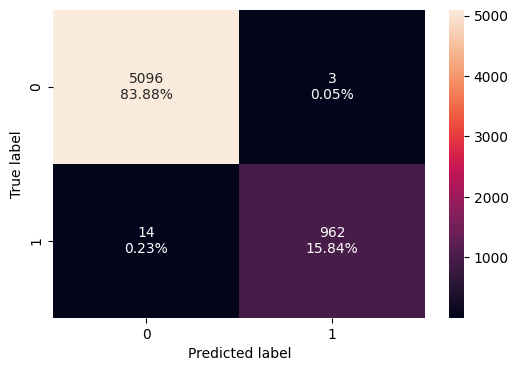

TRAIN MODEL NAME:  Random forest


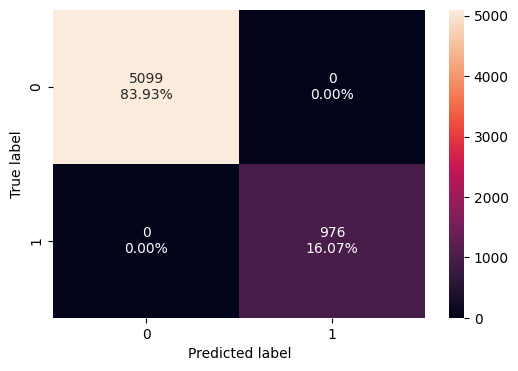

TRAIN MODEL NAME:  Adaboost


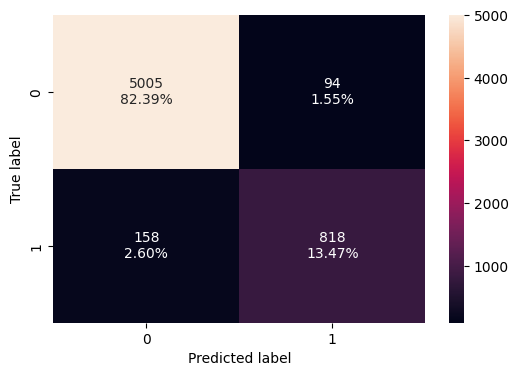

TRAIN MODEL NAME:  GBM


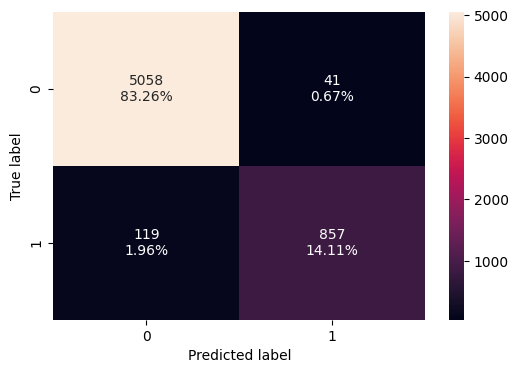

TRAIN MODEL NAME:  XGB


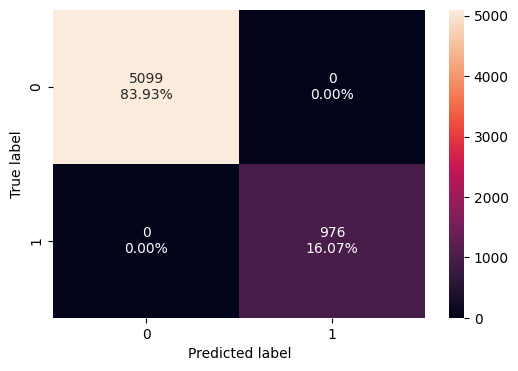

TRAIN MODEL NAME:  DT


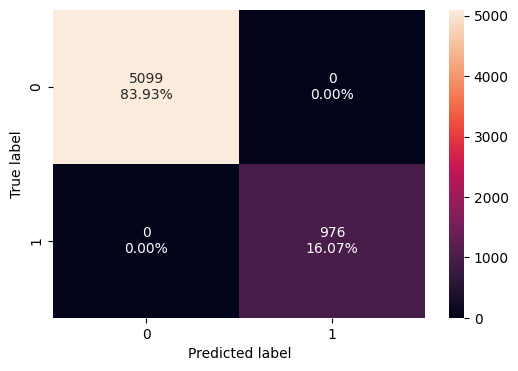

In [59]:
for name, model in models:
  print ("TRAIN MODEL NAME: ", name)
  confusion_matrix_sklearn(model, X_train, y_train)
  plt.show()

VAL MODEL NAME:  Bagging


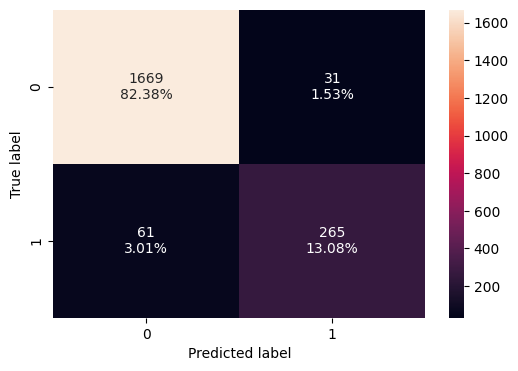

VAL MODEL NAME:  Random forest


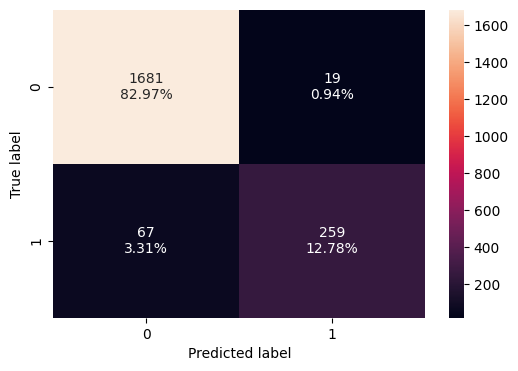

VAL MODEL NAME:  Adaboost


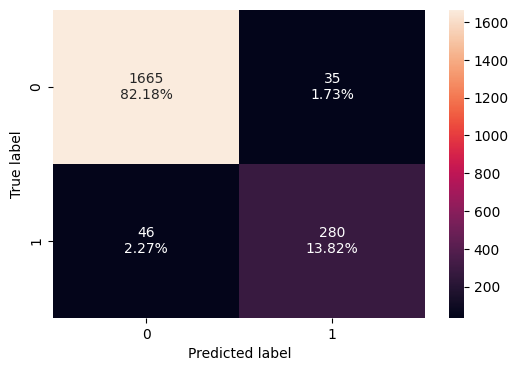

VAL MODEL NAME:  GBM


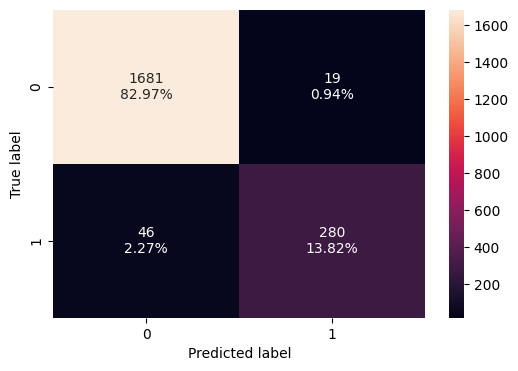

VAL MODEL NAME:  XGB


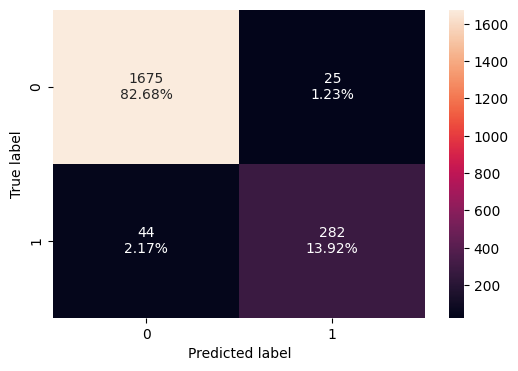

VAL MODEL NAME:  DT


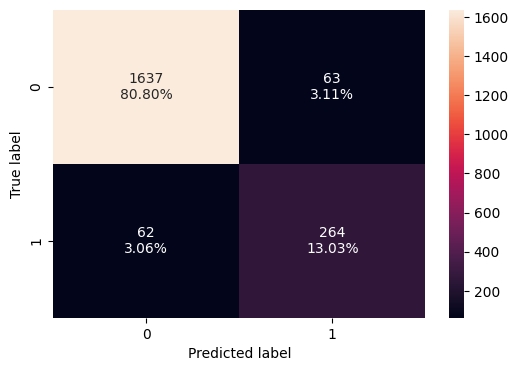

In [60]:
for name, model in models:
  print ("VAL MODEL NAME: ", name)
  confusion_matrix_sklearn(model, X_val, y_val)
  plt.show()

### Model Building with Oversampled data


In [61]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

# REDO MODEL FIT AND VAL for OVERSAMPLED DATA
over_models = []
over_models.append(("Bagging", BaggingClassifier(random_state=1)))
over_models.append(("Random forest", RandomForestClassifier(random_state=1)))
over_models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
over_models.append(("GBM", GradientBoostingClassifier(random_state=1)))
over_models.append(("XGB", XGBClassifier(random_state=1)))
over_models.append(("DT", DecisionTreeClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in over_models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in over_models:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))

Before OverSampling, count of label '1': 976
Before OverSampling, count of label '0': 5099 

After OverSampling, count of label '1': 5099
After OverSampling, count of label '0': 5099 

After OverSampling, the shape of train_X: (10198, 29)
After OverSampling, the shape of train_y: (10198,) 


Training Performance:

Bagging: 0.9984310649146891
Random forest: 1.0
Adaboost: 0.9705824671504216
GBM: 0.9805844283192783
XGB: 1.0
DT: 1.0

Validation Performance:

Bagging: 0.843558282208589
Random forest: 0.8251533742331288
Adaboost: 0.8834355828220859
GBM: 0.8865030674846626
XGB: 0.8895705521472392
DT: 0.8374233128834356


In [62]:
for name, model in models:
    print("Model Name:", name)
    print(model_performance_classification_sklearn(model, X_val, y_val))
    print("")
    print("")

Model Name: Bagging
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.955   0.813      0.895 0.852    0.897


Model Name: Random forest
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.958   0.794      0.932 0.858    0.892


Model Name: Adaboost
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.960   0.859      0.889 0.874    0.919


Model Name: GBM
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.968   0.859      0.936 0.896    0.924


Model Name: XGB
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.966   0.865      0.919 0.891    0.925


Model Name: DT
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.938   0.810      0.807 0.809    0.886




### Model Building with Undersampled data

In [63]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))


# REDO MODEL FIT AND VAL for UNDERSAMPLED DATA
under_models = []
under_models.append(("Bagging", BaggingClassifier(random_state=1)))
under_models.append(("Random forest", RandomForestClassifier(random_state=1)))
under_models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
under_models.append(("GBM", GradientBoostingClassifier(random_state=1)))
under_models.append(("XGB", XGBClassifier(random_state=1)))
under_models.append(("DT", DecisionTreeClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in under_models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in under_models:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 


Training Performance:

Bagging: 0.9918032786885246
Random forest: 1.0
Adaboost: 0.9528688524590164
GBM: 0.9795081967213115
XGB: 1.0
DT: 1.0

Validation Performance:

Bagging: 0.9355828220858896
Random forest: 0.9386503067484663
Adaboost: 0.9601226993865031
GBM: 0.9662576687116564
XGB: 0.9693251533742331
DT: 0.901840490797546


In [64]:
for name, model in models:
    print("Model Name:", name)
    print(model_performance_classification_sklearn(model, X_val, y_val))
    print("")
    print("")

Model Name: Bagging
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.955   0.813      0.895 0.852    0.897


Model Name: Random forest
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.958   0.794      0.932 0.858    0.892


Model Name: Adaboost
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.960   0.859      0.889 0.874    0.919


Model Name: GBM
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.968   0.859      0.936 0.896    0.924


Model Name: XGB
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.966   0.865      0.919 0.891    0.925


Model Name: DT
   Accuracy  Recall  Precision    F1  ROC-AUC
0     0.938   0.810      0.807 0.809    0.886




##CONCLUSION:

### BAsed on 15 models evaluated above, choosing the below 3 from each of the 5 sets in order of prio:

1) Best validation performance on UNDERSAMPLED data - XGB with Undersampled data provides the best Recall in validation set. And it also does not vary much from the Recall on the Training set (ie, very less overfitting).
XGB Recall: 0.9693251533742331

2) Best validation performance on ORIGINAL data - XGB  - Did best on training and also closest of the ones that did best on training to validation set
XGB Recall: 0.8895705521472392


3) Best validation performance on OVERSAMPLED data- XGB.
Did best on training and also closest among the ones that did best on training to validation set
XGB Recall: 0.8650306748466258


### The other models either have low recall in validation set or vary a lot with Recall seen on the training set.

##Chosen Models for Hypertuning:
#1. xgb_with_origdata
#2. xgb_with_oversampled_data
#3. xgb_with_undersampled_data


### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

####  tuning method for XGB with ORIG data

In [65]:

# Define the parameter grid
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Define the scorer
scorer = metrics.make_scorer(metrics.recall_score)

# Create an  classifier
xgb_orig = XGBClassifier(random_state=1)

# Create RandomizedSearchCV instance
randomized_cv_xgb_orig = RandomizedSearchCV(
    estimator=xgb_orig,
    param_distributions=param_grid,
    n_iter=10,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1
)

# Fit the RandomizedSearchCV instance on the oversampled data
randomized_cv_xgb_orig.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found:", randomized_cv_xgb_orig.best_params_)
print("Best recall score found:", randomized_cv_xgb_orig.best_score_)


Best parameters found: {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 75, 'learning_rate': 0.05, 'gamma': 3}
Best recall score found: 0.9190371533228676


In [66]:
# TUNE our MODEL WITH the BEST PARAMS found, random_state=1
xgb_orig_tuned = XGBClassifier( random_state=1,
                               subsample= 0.7, scale_pos_weight= 5, n_estimators= 75, learning_rate= 0.05, gamma= 3
)

# Fit the model on training data
xgb_orig_tuned.fit(X_train, y_train)


# Call model_performance_classification_sklearn using above model on TRAIN AND VAL
# Calculating different metrics on train set
xgb_orig_grid_train = model_performance_classification_sklearn(
    xgb_orig_tuned, X_train, y_train
)

xgb_orig_grid_val = model_performance_classification_sklearn(
    xgb_orig_tuned, X_val, y_val
)

####  tuning method for XGB with OVERSAMPLED data

In [67]:
# Define the parameter grid
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Define the scorer
scorer = metrics.make_scorer(metrics.recall_score)

# Create an  classifier
xgb_over = XGBClassifier(random_state=1)

# Create RandomizedSearchCV instance
randomized_cv_xgb_over = RandomizedSearchCV(
    estimator=xgb_over,
    param_distributions=param_grid,
    n_iter=10,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1
)

# Fit the RandomizedSearchCV instance on the oversampled data
randomized_cv_xgb_over.fit(X_train_over, y_train_over)

# Print the best parameters and best score
print("Best parameters found:", randomized_cv_xgb_over.best_params_)
print("Best recall score found:", randomized_cv_xgb_over.best_score_)


Best parameters found: {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 75, 'learning_rate': 0.05, 'gamma': 3}
Best recall score found: 0.9798039215686274


In [68]:
# TUNE our MODEL WITH the BEST PARAMS found, random_state=1
xgb_over_tuned = XGBClassifier( random_state=1,
                               subsample= 0.7, scale_pos_weight= 5, n_estimators= 75, learning_rate= 0.05, gamma= 3
)

# Fit the model on training data
xgb_over_tuned.fit(X_train_over, y_train_over)


# Call model_performance_classification_sklearn using above model on TRAIN AND VAL
# Calculating different metrics on train set
xgb_over_grid_train = model_performance_classification_sklearn(
    xgb_over_tuned, X_train_over, y_train_over
)

xgb_over_grid_val = model_performance_classification_sklearn(
    xgb_over_tuned, X_val, y_val
)

####  tuning method for XGB with UNDERSAMPLED data

In [69]:
# Define the parameter grid
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Define the scorer
scorer = metrics.make_scorer(metrics.recall_score)

# Create an  classifier
xgb_under = XGBClassifier(random_state=1)

# Create RandomizedSearchCV instance
randomized_cv_xgb_under = RandomizedSearchCV(
    estimator=xgb_under,
    param_distributions=param_grid,
    n_iter=10,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1
)

# Fit the RandomizedSearchCV instance on the oversampled data
randomized_cv_xgb_under.fit(X_train_un, y_train_un)

# Print the best parameters and best score
print("Best parameters found:", randomized_cv_xgb_under.best_params_)
print("Best recall score found:", randomized_cv_xgb_under.best_score_)


Best parameters found: {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 75, 'learning_rate': 0.05, 'gamma': 3}
Best recall score found: 0.9774882260596547


In [70]:
# TUNE our MODEL WITH the BEST PARAMS found, random_state=1
xgb_under_tuned = XGBClassifier( random_state=1,
                               subsample= 0.7, scale_pos_weight= 5, n_estimators= 75, learning_rate= 0.05, gamma= 3
)

# Fit the model on training data
xgb_under_tuned.fit(X_train_un, y_train_un)


# Call model_performance_classification_sklearn using above model on TRAIN AND VAL
# Calculating different metrics on train set
xgb_under_grid_train = model_performance_classification_sklearn(
    xgb_under_tuned, X_train_un, y_train_un
)

xgb_under_grid_val = model_performance_classification_sklearn(
    xgb_under_tuned, X_val, y_val
)

## Model Comparison and Final Model Selection

In [71]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
      xgb_orig_grid_train.T,
      xgb_over_grid_train.T,
      xgb_under_grid_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGB_hypertuned_RandomSearchCV_ORIG_Data",
    "XGB_hypertuned_RandomSearchCV_Oversampled_Data",
    "XGB_hypertuned_RandomSearchCV_Undersampled_Data",

]
print("Training performance comparison:")
models_train_comp_df




Training performance comparison:


XGB_hypertuned_RandomSearchCV_ORIG_Data  \
Accuracy                                     0.974   
Recall                                       0.995   
Precision                                    0.865   
F1                                           0.925   
ROC-AUC                                      0.983   

           XGB_hypertuned_RandomSearchCV_Oversampled_Data  \
Accuracy                                            0.974   
Recall                                              1.000   
Precision                                           0.951   
F1                                                  0.974   
ROC-AUC                                             0.974   

           XGB_hypertuned_RandomSearchCV_Undersampled_Data  
Accuracy                                             0.960  
Recall                                               1.000  
Precision                                            0.925  
F1                                                   0.961  
ROC-AUC                                              0.960

In [72]:
# VAL performance comparison
models_val_comp_df = pd.concat(
    [
      xgb_orig_grid_val.T,
      xgb_over_grid_val.T,
      xgb_under_grid_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "XGB_hypertuned_RandomSearchCV_ORIG_Data",
    "XGB_hypertuned_RandomSearchCV_Oversampled_Data",
    "XGB_hypertuned_RandomSearchCV_Undersampled_Data",

]
print("VALIDATION performance comparison:")
models_val_comp_df

VALIDATION performance comparison:


XGB_hypertuned_RandomSearchCV_ORIG_Data  \
Accuracy                                     0.956   
Recall                                       0.939   
Precision                                    0.816   
F1                                           0.873   
ROC-AUC                                      0.949   

           XGB_hypertuned_RandomSearchCV_Oversampled_Data  \
Accuracy                                            0.936   
Recall                                              0.948   
Precision                                           0.734   
F1                                                  0.827   
ROC-AUC                                             0.941   

           XGB_hypertuned_RandomSearchCV_Undersampled_Data  
Accuracy                                             0.896  
Recall                                               0.988  
Precision                                            0.610  
F1                                                   0.754  
ROC-AUC                                              0.933

### BEST MODEL CHOSEN

- XGB_hypertuned_RandomSearchCV_Oversampled_Data

XGBoost with Oversampled Data and then hypertuned  with parameters obtained from RandomSearchCV

Reason: Highest Recall and Least Overfitting with Validation Set Performance closest to Training Set performance. Also,  F1, ROC-AIC are  good. This  means it is best for this ussecase

Additionally, other metrics are also highest: Meaning it will perform good also on the other aspects like False positive, etc..

##### Let's check the performance on test set on our chosen model


### Test set final performance

In [73]:
Model_test = model_performance_classification_sklearn(xgb_over_tuned, X_test, y_test)
Model_test

Accuracy  Recall  Precision    F1  ROC-AUC
0     0.939   0.972      0.733 0.836    0.952

In [74]:
feature_importances = xgb_over_tuned.feature_importances_
for i, importance in enumerate(feature_importances):
    print(f"Feature {feature_names[i]}: Importance = {importance}")

Feature Customer_Age: Importance = 0.01980598457157612
Feature Dependent_count: Importance = 0.01788775995373726
Feature Months_on_book: Importance = 0.01357334479689598
Feature Total_Relationship_Count: Importance = 0.04883166775107384
Feature Months_Inactive_12_mon: Importance = 0.04932628571987152
Feature Contacts_Count_12_mon: Importance = 0.03035697154700756
Feature Credit_Limit: Importance = 0.01896979659795761
Feature Total_Revolving_Bal: Importance = 0.053592126816511154
Feature Avg_Open_To_Buy: Importance = 0.029062069952487946
Feature Total_Amt_Chng_Q4_Q1: Importance = 0.03274666517972946
Feature Total_Trans_Amt: Importance = 0.07748861610889435
Feature Total_Trans_Ct: Importance = 0.23960600793361664
Feature Total_Ct_Chng_Q4_Q1: Importance = 0.0389585867524147
Feature Avg_Utilization_Ratio: Importance = 0.03209696337580681
Feature Gender_M: Importance = 0.0447402261197567
Feature Education_Level_Doctorate: Importance = 0.005759861320257187
Feature Education_Level_Graduate: I

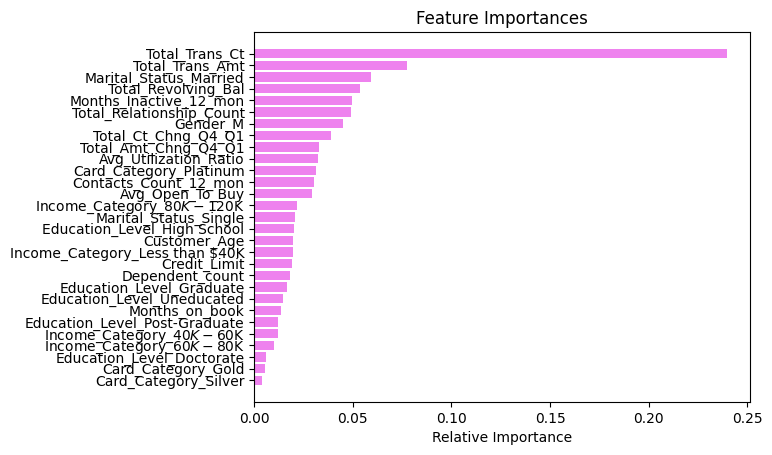

In [75]:
indices = np.argsort(feature_importances)
#indices.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), feature_importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions

***

1. Use the chosen model to analyse churn
2. Target customers that come under the list of 3 most important features:
Total_Trans_Ct,
Total_Tran_Amt,
Marital_Status_Married

3. Target customers that fall in the below categories :

From EDA:
From the bivariate analyses : Following group of customers are more likely to leave:

* Total_trans_ct : 75% of leaving folks have below  Total_trans_ct 50
* Total_trans_Amt : 75% of leaving folks have Total_trans_Amt below 2700. IQR between 1700-2700
* Highest number of people leaving who are Martial_Status_married
* Total_revolving_bal : 75% of leaving people have Total_revolving_bal below 1250
* Months_Inactive_12Mon: Highest number of people leaving who are inactive more than half the year
* Total_Relationship_count: Highest number of people leaving  have  2 Relationship products
* Gender_Male





In [78]:
!jupyter nbconvert "C:\\Users\\abrah\\Downloads\\PGAIML\\proj3\\AbrahamAML_Project_FullCode_Final.ipynb" --to html

[NbConvertApp] WARNING | pattern 'C:\\Users\\abrah\\Downloads\\PGAIML\\proj3\\AbrahamAML_Project_FullCode_Final.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of promptin